In [69]:
import numpy as np 
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [70]:
# Select the path 
file_path = "SpotifyFeatures.csv" 

# Load the data into a DataFrame 
df = pd.read_csv(file_path)
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

**Single Feature Correlation with Popularity**

In [384]:
# Genre and population
genrePopMean = df.groupby('genre', sort = True)['popularity'].mean()
genrePopMean.sort_values(ascending = False).head(50) 

genre
Pop                 66.590667
Rap                 60.533795
Rock                59.619392
Hip-Hop             58.423131
Dance               57.275256
Indie               54.701561
Children’s Music    54.659040
R&B                 52.308719
Alternative         50.213430
Folk                49.940209
Soul                47.027836
Country             46.100416
Jazz                40.824383
Electronic          38.056095
Reggaeton           37.742915
Reggae              35.589328
World               35.524077
Blues               34.742879
Soundtrack          33.954800
Classical           29.282195
Ska                 28.612351
Anime               24.258729
Comedy              21.342630
Opera               13.335628
Movie               12.174097
A Capella            9.302521
Children's Music     4.252637
Name: popularity, dtype: float64

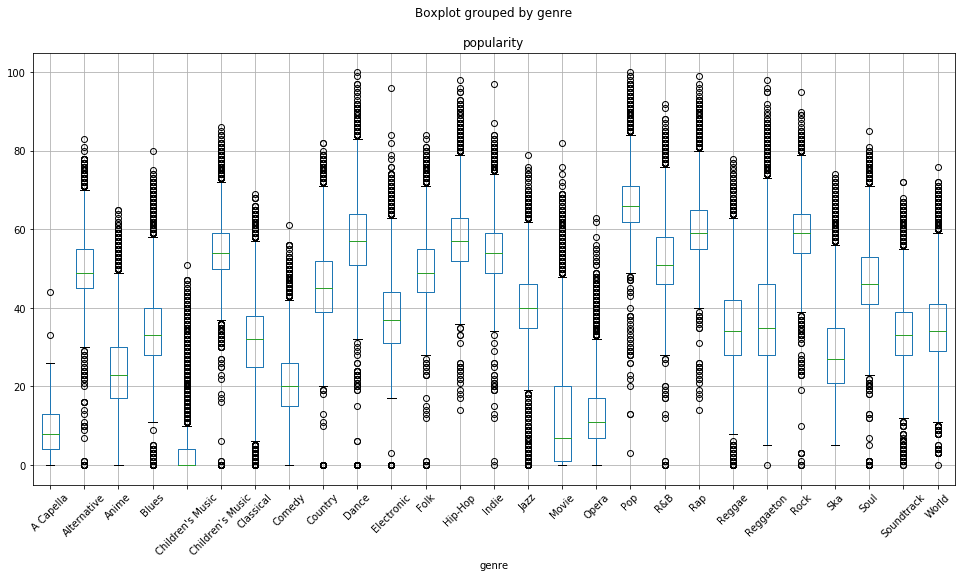

In [385]:
df.boxplot(column='popularity', by='genre', figsize=(16,8), rot=45)

In [23]:
# Artists and population
artistPop = df.groupby('artist_name', sort=True)['popularity'].mean()
artistPop.sort_values(ascending = False).head(50) 
#artists = list(genrePopMean.keys())[:50]
#means = genrePopMean.tolist()[:50]

artist_name
Pedro Capó              87.000000
Mario Bautista          85.000000
Mau y Ricky             83.000000
Kris Kross Amsterdam    82.000000
Ninho                   82.000000
Paloma Mami             82.000000
Martin Garrix           81.857143
Sofia Reyes             81.500000
Anitta                  81.000000
Kenny Man               81.000000
Heuss L'enfoiré         81.000000
NSG                     81.000000
Billie Eilish           80.500000
Piso 21                 80.500000
4 Non Blondes           80.000000
Coolio                  80.000000
Grupo Arranke           80.000000
JENNIE                  80.000000
juan karlos             80.000000
Ramz                    80.000000
Lele Pons               80.000000
Rombai                  80.000000
XO Cupid                79.500000
Drax Project            79.000000
Katrina & The Waves     79.000000
Joel Adams              79.000000
Silk City               78.500000
Tommy Boysen            78.000000
Dennis Lloyd            78.000000
Da

Text(0.5, 1.0, 'Acousticness&Popularity Correlation')

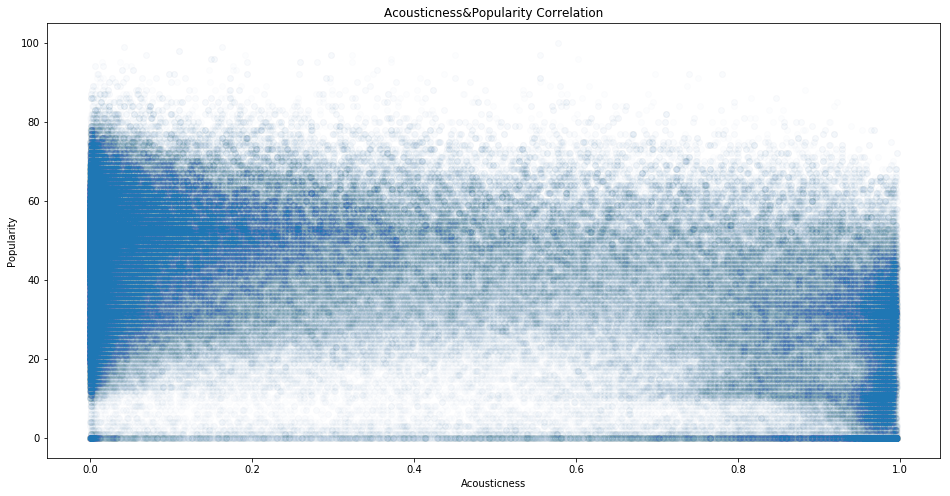

In [24]:
# acousticness and population
acous = df['acousticness'].tolist()
popularity = df['popularity'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(acous, popularity, alpha = 0.01)
ax.set_xlabel("Acousticness")
ax.set_ylabel("Popularity")
ax.set_title("Acousticness&Popularity Correlation")

Text(0.5, 1.0, 'Danceability&Popularity Correlation')

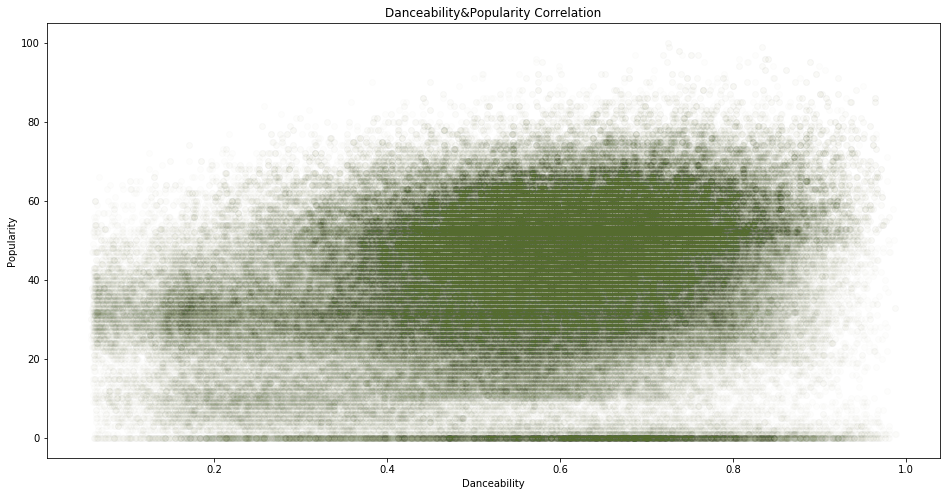

In [25]:
# danceability and population
dance = df['danceability'].tolist()

# whole graph
fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(dance, popularity, alpha = 0.01, color = "darkOliveGreen")
ax.set_xlabel("Danceability")
ax.set_ylabel("Popularity")
ax.set_title("Danceability&Popularity Correlation")

In [26]:
# energy and population
energy = df['energy'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(energy, popularity, alpha = 0.01, color = "maroon")
ax.set_xlabel("Energy")
ax.set_ylabel("Popularity")
ax.set_title("Energy&Popularity Correlation")

Text(0.5, 1.0, 'Energy&Popularity Correlation')

Text(0.5, 1.0, 'Instrumentalness&Popularity Correlation')

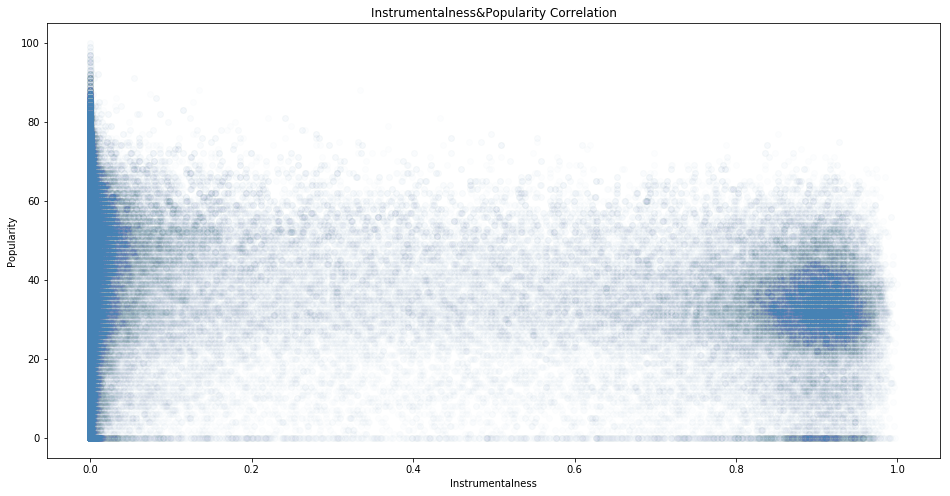

In [27]:
# instrumentalness and population
instru = df['instrumentalness'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(instru, popularity, alpha = 0.01, color = "steelblue")
ax.set_xlabel("Instrumentalness")
ax.set_ylabel("Popularity")
ax.set_title("Instrumentalness&Popularity Correlation")

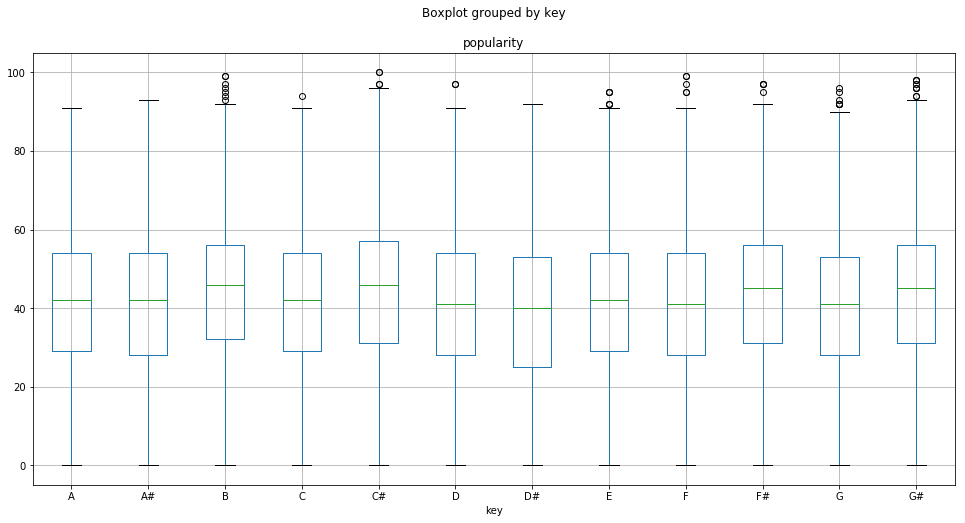

In [28]:
# Key and population
df.boxplot(column='popularity', by='key', figsize=(16,8))

In [29]:
# liveness and population
live = df['liveness'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(live, popularity, alpha = 0.01, color = "orange")
ax.set_xlabel("Liveness")
ax.set_ylabel("Popularity")
ax.set_title("Liveness&Popularity Correlation")

Text(0.5, 1.0, 'Liveness&Popularity Correlation')

Text(0.5, 1.0, 'Loudness&Popularity Correlation')

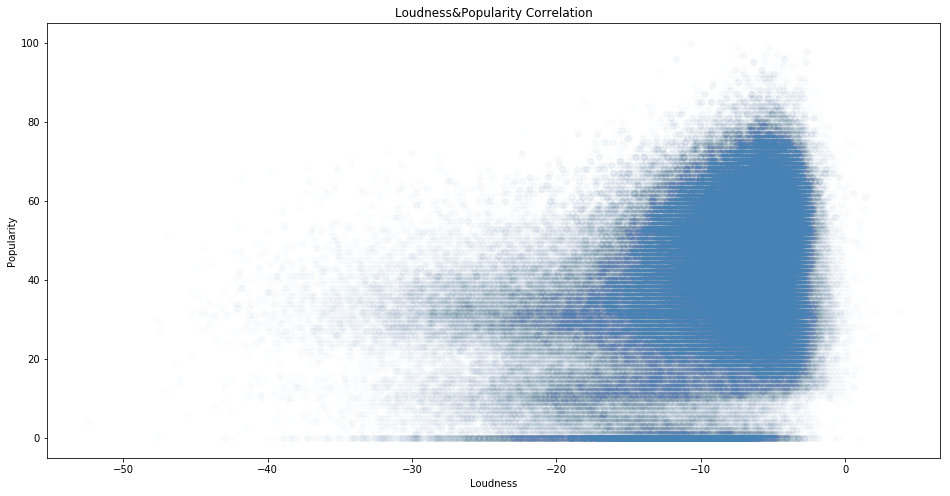

In [30]:
# loudness and population
loud = df['loudness'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(loud, popularity, alpha = 0.01, color = "steelblue")
ax.set_xlabel("Loudness")
ax.set_ylabel("Popularity")
ax.set_title("Loudness&Popularity Correlation")

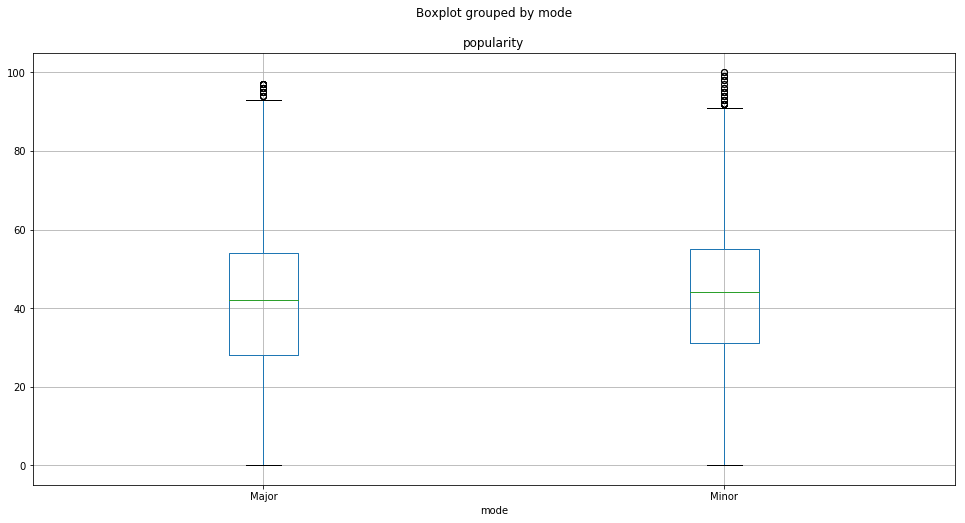

In [31]:
# Mode and population
df.boxplot(column='popularity', by='mode', figsize=(16,8))

In [32]:
# speechiness and population
speech = df['speechiness'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(speech, popularity, alpha = 0.01, color = "steelblue")
ax.set_xlabel("Speechiness")
ax.set_ylabel("Popularity")
ax.set_title("Speechiness&Popularity Correlation")

Text(0.5, 1.0, 'Speechiness&Popularity Correlation')

In [33]:
# tempo and population
tempo = df['tempo'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(tempo, popularity, alpha = 0.01, color = "steelblue")
ax.set_xlabel("Tempo")
ax.set_ylabel("Popularity")
ax.set_title("Tempo&Popularity Correlation")

Text(0.5, 1.0, 'Tempo&Popularity Correlation')

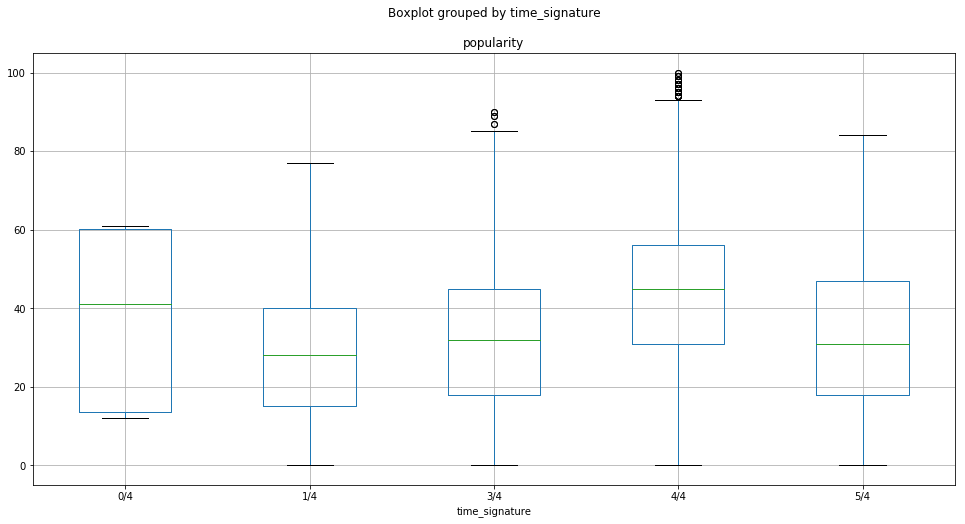

In [34]:
# time_signature and population
df.boxplot(column='popularity', by='time_signature', figsize=(16,8))

In [35]:
# valence and population
valence = df['valence'].tolist()

fig,ax = plt.subplots(1,1,figsize=(16,8))
ax.scatter(valence, popularity, alpha = 0.01, color = "darkSlateBlue")
ax.set_xlabel("Valence")
ax.set_ylabel("Popularity")
ax.set_title("Valence&Popularity Correlation")

Text(0.5, 1.0, 'Valence&Popularity Correlation')

Correlation between single feature and Popularity is:
popularity          1.000000
acousticness       -0.381295
danceability        0.256564
duration_ms         0.002348
energy              0.248922
instrumentalness   -0.210983
liveness           -0.167995
loudness            0.363011
speechiness        -0.151076
tempo               0.081039
valence             0.060076
Name: popularity, dtype: float64


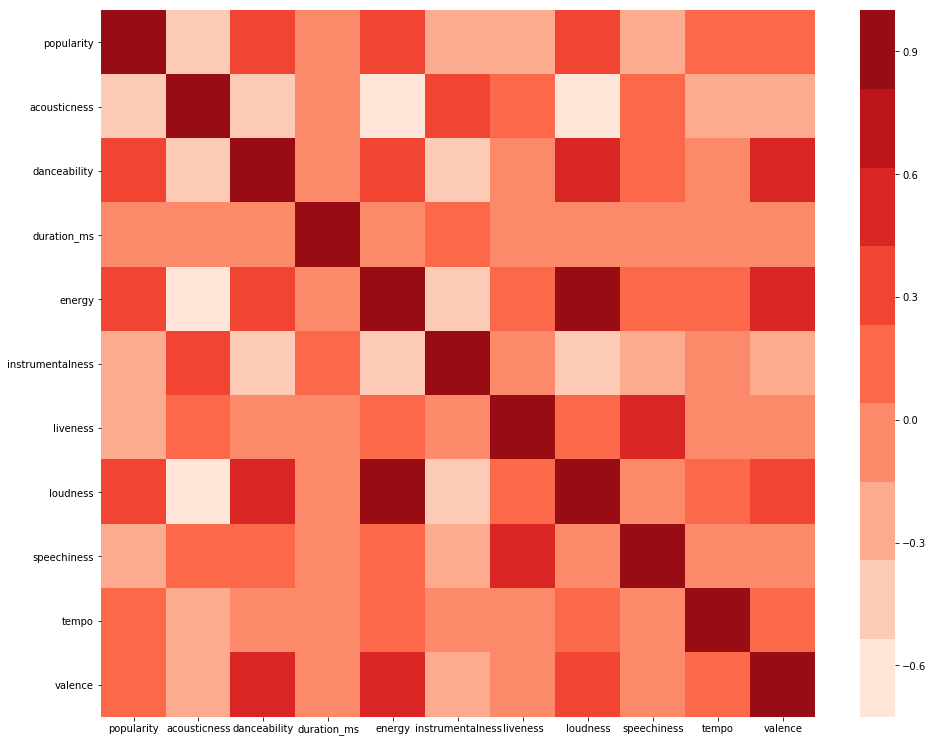

In [425]:
print("Correlation between single feature and Popularity is:")
correlation = df.corr().loc['popularity']
print(correlation)

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = df.corr().loc[a, b]
plt.figure(figsize=(16, 13))
cmap = sns.color_palette("Reds", 9)
sns.heatmap(corr, cmap=cmap)

**Multi-linear Regression**

In [332]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [333]:
genres = set(df["genre"].tolist())
print(genres)

{'Anime', 'Reggae', 'Classical', 'Pop', 'R&B', 'Soul', 'Blues', 'Hip-Hop', 'Opera', 'Children’s Music', 'Dance', 'Rock', 'Jazz', 'Comedy', 'Reggaeton', 'Indie', 'Rap', 'Alternative', 'Country', 'Electronic', 'Movie', "Children's Music", 'World', 'A Capella', 'Soundtrack', 'Ska', 'Folk'}


In [334]:
dfNumeric = df.select_dtypes([np.number])
cols = dfNumeric.columns.tolist()
cols = cols[1:] + cols[:1]
dfNumeric = dfNumeric[cols]
dfNumeric.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
0         0.611         0.389        99373   0.910             0.000   
1         0.246         0.590       137373   0.737             0.000   
2         0.952         0.663       170267   0.131             0.000   
3         0.703         0.240       152427   0.326             0.000   
4         0.950         0.331        82625   0.225             0.123   

   liveness  loudness  speechiness    tempo  valence  popularity  
0    0.3460    -1.828       0.0525  166.969    0.814           0  
1    0.1510    -5.559       0.0868  174.003    0.816           1  
2    0.1030   -13.879       0.0362   99.488    0.368           3  
3    0.0985   -12.178       0.0395  171.758    0.227           0  
4    0.2020   -21.150       0.0456  140.576    0.390           4

In [601]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfNumeric.iloc[:,-1], dfNumeric.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7106.
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:36:49   Log-Likelihood:            -9.7432e+05
No. Observations:              232725   AIC:                         1.949e+06
Df Residuals:                  232714   BIC:                         1.949e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3882      0.344    160.972      0.000      54.714      56.063
x1           -11.9349      0.155    -77.133      0.000     -12.238     -11.632
x2            17.7400      0.242     73.267      0.000      17.265      18.215
x3          2.457e-06   2.82e-07      8.726      0.000    1.91e-06    3.01e-06
x4            -5.6278      0.279    -20.142      0.000      -6.175      -5.080
x5            -4.3106      0.133    -32.400      0.000      -4.571      -4.050
x6            -9.6706      0.201    -48.078      0.000     -10.065      -9.276
x7             0.7151      0.011     63.499      0.000       0.693       0.737
x8            -8.1082      0.230    -35.275      0.000      -8.559      -7.658
x9            -0.0043      0.001     -3.824      0.000      -0.006      -0.002
x10          -13.2259      0.166    -79.707      0.000     -13.551     -12.901
==============================================================================
Omnibus:                     4217.319   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4446.702
Skew:                          -0.338   Prob(JB):                         0.00
Kurtosis:                       2.947   Cond. No.                     3.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [336]:
def backward_select(df, resp_str, maxsse):
    model = MLRmodel(df, resp_str)
    coe = model.params
    sse = model.ssr
    stage = 0
    while sse < maxsse:
        # pval escept for constant
        pval = model.pvalues[1:len(coe)]
        max_pval = pval.max()
        index = [i for i, j in enumerate(pval) if j == max_pval]
        
        names = list(df.head(0)) 
        print("Stage",stage,": |",names[index[0]],"| removed; SSE:", sse )
        print("=====================================================================================================================")

        dfTmp = df.drop(df.columns[index[0]],axis=1)
        
        tmpmodel = MLRmodel(dfTmp, resp_str)
        coe = tmpmodel.params
        sse = tmpmodel.ssr
        if sse < maxsse:
            df = df.drop(df.columns[index[0]],axis=1)
            remaining_features = list(df.head(0))
            print("Features retained: ", remaining_features[:-1])
            print("\n")
        else:
            print("BUT SSE={:.3f}> maxsse".format(sse))
        stage += 1
    
    return remaining_features[:-1]

def MLRmodel(df, resp_str):
    y, X = df.loc[:,resp_str], df.iloc[:,:-1]
    X = sm.add_constant(X.values)
    return sm.OLS(y, X).fit()

def sum_se(df, coe):
    sse = 0
    y = np.mean(df.iloc[:,-1])
    for i in range(len(df.count())):
        yi = df.iloc[i,-1]
        
        yhat_i = coe[0]
        for j in range(len(df.columns)-1):
            x = df.iloc[i,j]
            yhat_i += coe[j+1]*x
        sse += (yi - yhat_i)**2

    
    return sse

resp_str = "popularity"
retained_features = backward_select(dfNumeric, resp_str, 60700000)
print("\n")
print(retained_features, "are min# features SSE < 10000000")

Stage 0 : | tempo | removed; SSE: 58988702.72544339
Features retained:  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


Stage 1 : | valence | removed; SSE: 58992408.41896809
Features retained:  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']


Stage 2 : | duration_ms | removed; SSE: 60625915.50134774
Features retained:  ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']


Stage 3 : | energy | removed; SSE: 60690939.85647824
BUT SSE=61298826.293> maxsse


['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness'] are min# features SSE < 10000000


In [337]:
retained_features.append(resp_str)
dfReduced = dfNumeric[retained_features]

reduced_model = MLRmodel(dfReduced, resp_str)
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     8935.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:03:01   Log-Likelihood:            -9.7763e+05
No. Observations:              232725   AIC:                         1.955e+06
Df Residuals:                  232717   BIC:                         1.955e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0340      0.297    202.323      0.000      59.452      60.616
x1           -13.6841      0.155    -88.402      0.000     -13.987     -13.381
x2             8.2444      0.213     38.752      0.000       7.827       8.661
x3           -12.9520      0.268    -48.280      0.000     -13.478     -12.426
x4            -3.0815      0.134    -22.989      0.000      -3.344      -2.819
x5            -9.4952      0.204    -46.610      0.000      -9.894      -9.096
x6             0.8298      0.011     73.370      0.000       0.808       0.852
x7            -4.9568      0.230    -21.573      0.000      -5.407      -4.506
==============================================================================
Omnibus:                     5826.816   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6277.351
Skew:                          -0.402   Prob(JB):                         0.00
Kurtosis:                       3.002   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
model_f = MLRmodel(dfNumeric, resp_str)
sse_f = model_f.ssr
p = len(dfNumeric.columns)-1

model_r = MLRmodel(dfReduced, resp_str)
sse_r = model_r.ssr
k = len(dfReduced.columns)-1

n = (dfNumeric['energy'].count())
alpha = 0.025

F = ((sse_r - sse_f)/(p-k))/(sse_f/(n-p-1))

f = 1-stats.f.cdf(1-alpha, p-k, n-p-1)
print("Our f-statistic: {:.4f} compare to f-test {:.4f}".format(F, f))

Our f-statistic: 2238.4761 compare to f-test 0.4033


### Outlier analysis

Text(0, 0.5, 'popularity')

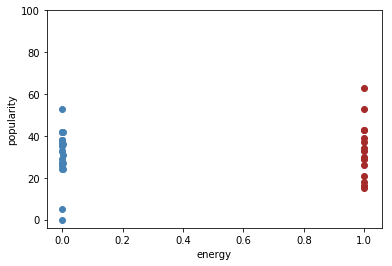

In [339]:
from pyod.utils.data import generate_data, get_outliers_inliers

#generate random data with two features
#X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

energy = dfNumeric['energy'].tolist()
popular = dfNumeric['popularity'].tolist()
X1 = np.array([[energy[i], popular[i]] for i in range(len(energy))])
mean_energy = np.mean(energy)
energyQ3 = np.percentile(energy, 75)
energyQ1 = np.percentile(energy, 25)
energyIQR = energyQ3 - energyQ1
Y1_high = [1 if energy[i]>energyQ3+0.525*energyIQR else 0 for i in range(len(energy))]
Y1_low = [-1 if energy[i]<energyQ1-0.956*energyIQR else 0 for i in range(len(energy))]

X_energy_high, Y_energy_high = [], []
for i in range(len(Y1_high)):
    if Y1_high[i] == 1:
        X_energy_high.append(X1[i][0])
        Y_energy_high.append(X1[i][1])
        
X_energy_low, Y_energy_low = [], []
for i in range(len(Y1_low)):
    if Y1_low[i] == -1:
        X_energy_low.append(X1[i][0])
        Y_energy_low.append(X1[i][1])

# scatter plot 
plt.scatter(X_energy_high, Y_energy_high, color="brown")
plt.scatter(X_energy_low, Y_energy_low, color="steelblue")
plt.ylim(top=100)
plt.xlabel('energy')
plt.ylabel('popularity') 


Text(0, 0.5, 'popularity')

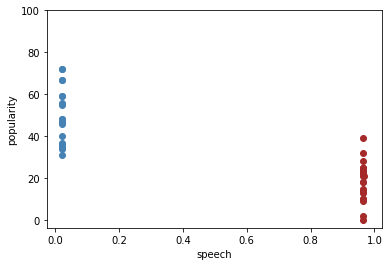

In [340]:
speech = dfNumeric['speechiness'].tolist()
X2 = np.array([[speech[i], popular[i]] for i in range(len(speech))])
mean_speech = np.mean(speech)
speechQ3 = np.percentile(speech, 75)
speechQ1 = np.percentile(speech, 25)
speechIQR = speechQ3 - speechQ1


Y2_high = [1 if speech[i]>speechQ3+12.57*speechIQR else 0 for i in range(len(speech))]
Y2_low = [-1 if speech[i]<speechQ1-0.205*speechIQR else 0 for i in range(len(speech))]

X_speech_high, Y_speech_high = [], []
for i in range(len(Y2_high)):
    if Y2_high[i] == 1:
        X_speech_high.append(X2[i][0])
        Y_speech_high.append(X2[i][1])
        
X_speech_low, Y_speech_low = [], []
for i in range(len(Y2_low)):
    if Y2_low[i] == -1:
        X_speech_low.append(X2[i][0])
        Y_speech_low.append(X2[i][1])

# scatter plot 
plt.scatter(X_speech_high, Y_speech_high, color="brown")
plt.scatter(X_speech_low, Y_speech_low, color="steelblue")
plt.ylim(top=100)
plt.xlabel('speech')
plt.ylabel('popularity') 


Text(0, 0.5, 'popularity')

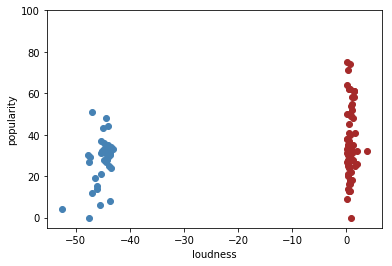

In [341]:
loud = dfNumeric['loudness'].tolist()
X3 = np.array([[loud[i], popular[i]] for i in range(len(loud))])
mean_loud = np.mean(loud)
loudQ3 = np.percentile(loud, 75)
loudQ1 = np.percentile(loud, 25)
loudIQR = loudQ3 - loudQ1


Y3_high = [1 if loud[i]>loudQ3+0.9*loudIQR else 0 for i in range(len(loud))]
Y3_low = [-1 if loud[i]<loudQ1-5*loudIQR else 0 for i in range(len(loud))]

X_loud_high, Y_loud_high = [], []
for i in range(len(Y3_high)):
    if Y3_high[i] == 1:
        X_loud_high.append(X3[i][0])
        Y_loud_high.append(X3[i][1])
        
X_loud_low, Y_loud_low = [], []
for i in range(len(Y3_low)):
    if Y3_low[i] == -1:
        X_loud_low.append(X3[i][0])
        Y_loud_low.append(X3[i][1])

# scatter plot 
plt.scatter(X_loud_high, Y_loud_high, color="brown")
plt.scatter(X_loud_low, Y_loud_low, color="steelblue")
plt.ylim(top=100)
plt.xlabel('loudness')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

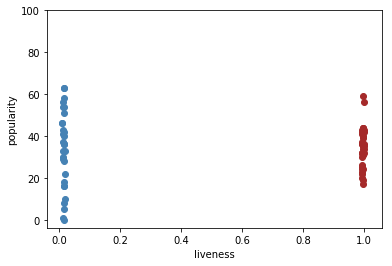

In [342]:
live = dfNumeric['liveness'].tolist()
X4 = np.array([[live[i], popular[i]] for i in range(len(live))])
mean_live = np.mean(live)
liveQ3 = np.percentile(live, 75)
liveQ1 = np.percentile(live, 25)
liveIQR = liveQ3 - liveQ1


Y4_high = [1 if live[i]>liveQ3+4.37*liveIQR else 0 for i in range(len(live))]
Y4_low = [-1 if live[i]<liveQ1-0.48*liveIQR else 0 for i in range(len(live))]

X_live_high, Y_live_high = [], []
for i in range(len(Y4_high)):
    if Y4_high[i] == 1:
        X_live_high.append(X4[i][0])
        Y_live_high.append(X4[i][1])
        
X_live_low, Y_live_low = [], []
for i in range(len(Y4_low)):
    if Y4_low[i] == -1:
        X_live_low.append(X4[i][0])
        Y_live_low.append(X4[i][1])

# scatter plot 
plt.scatter(X_live_high, Y_live_high, color="brown")
plt.scatter(X_live_low, Y_live_low, color="steelblue")
plt.ylim(top=100)
plt.xlabel('liveness')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

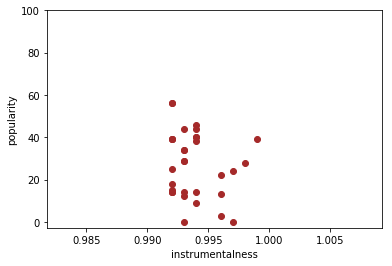

In [526]:
instru = dfNumeric['instrumentalness'].tolist()
X5 = np.array([[instru[i], popular[i]] for i in range(len(instru))])
mean_instru = np.mean(instru)
instruQ3 = np.percentile(instru, 75)
instruQ1 = np.percentile(instru, 25)
instruIQR = instruQ3 - instruQ1


Y5_high = [1 if instru[i]>instruQ3+26.7*instruIQR else 0 for i in range(len(instru))]
Y5_low = [-1 if instru[i]<instruQ1 else 0 for i in range(len(instru))]

X_instru_high, Y_instru_high = [], []
for i in range(len(Y5_high)):
    if Y5_high[i] == 1:
        X_instru_high.append(X5[i][0])
        Y_instru_high.append(X5[i][1])
        
X_instru_low, Y_instru_low = [], []
for i in range(len(Y5_low)):
    if Y5_low[i] == -1:
        X_instru_low.append(X5[i][0])
        Y_instru_low.append(X5[i][1])

# scatter plot 
plt.scatter(X_instru_high, Y_instru_high, color="brown")
plt.ylim(top=100)
plt.scatter(X_instru_low, Y_instru_low, color="steelblue")
plt.xlabel('instrumentalness')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

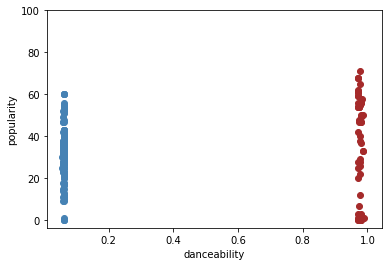

In [344]:
dance = dfNumeric['danceability'].tolist()
X6 = np.array([[dance[i], popular[i]] for i in range(len(dance))])
mean_dance = np.mean(dance)
danceQ3 = np.percentile(dance, 75)
danceQ1 = np.percentile(dance, 25)
danceIQR = danceQ3 - danceQ1


Y6_high = [1 if dance[i]>danceQ3+1.08*danceIQR else 0 for i in range(len(dance))]
Y6_low = [-1 if dance[i]<danceQ1-1.45*danceIQR else 0 for i in range(len(dance))]

X_dance_high, Y_dance_high = [], []
for i in range(len(Y6_high)):
    if Y6_high[i] == 1:
        X_dance_high.append(X6[i][0])
        Y_dance_high.append(X6[i][1])
        
X_dance_low, Y_dance_low = [], []
for i in range(len(Y6_low)):
    if Y6_low[i] == -1:
        X_dance_low.append(X6[i][0])
        Y_dance_low.append(X6[i][1])

# scatter plot 
plt.scatter(X_dance_high, Y_dance_high, color="brown")
plt.ylim(top=100)
plt.scatter(X_dance_low, Y_dance_low, color="steelblue")
plt.xlabel('danceability')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

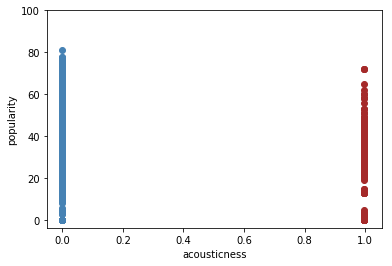

In [345]:
acous = dfNumeric['acousticness'].tolist()
X7 = np.array([[acous[i], popular[i]] for i in range(len(acous))])
mean_acous = np.mean(acous)
acousQ3 = np.percentile(acous, 75)
acousQ1 = np.percentile(acous, 25)
acousIQR = acousQ3 - acousQ1


Y7_high = [1 if acous[i]>acousQ3+0.4*acousIQR else 0 for i in range(len(acous))]
Y7_low = [-1 if acous[i]<acousQ1-0.0547*acousIQR else 0 for i in range(len(acous))]

X_acous_high, Y_acous_high = [], []
for i in range(len(Y7_high)):
    if Y7_high[i] == 1:
        X_acous_high.append(X7[i][0])
        Y_acous_high.append(X7[i][1])
        
X_acous_low, Y_acous_low = [], []
for i in range(len(Y7_low)):
    if Y7_low[i] == -1:
        X_acous_low.append(X7[i][0])
        Y_acous_low.append(X7[i][1])

# scatter plot 
plt.scatter(X_acous_high, Y_acous_high, color="brown")
plt.ylim(top=100)
plt.scatter(X_acous_low, Y_acous_low, color="steelblue")
plt.xlabel('acousticness')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

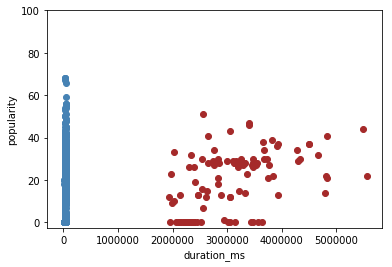

In [346]:
durat = dfNumeric['duration_ms'].tolist()
X8 = np.array([[durat[i], popular[i]] for i in range(len(durat))])
mean_durat = np.mean(durat)
duratQ3 = np.percentile(durat, 75)
duratQ1 = np.percentile(durat, 25)
duratIQR = duratQ3 - duratQ1


Y8_high = [1 if durat[i]>duratQ3+20*duratIQR else 0 for i in range(len(durat))]
Y8_low = [-1 if durat[i]<duratQ1-1.7*duratIQR else 0 for i in range(len(durat))]

X_durat_high, Y_durat_high = [], []
for i in range(len(Y8_high)):
    if Y8_high[i] == 1:
        X_durat_high.append(X8[i][0])
        Y_durat_high.append(X8[i][1])
        
X_durat_low, Y_durat_low = [], []
for i in range(len(Y8_low)):
    if Y8_low[i] == -1:
        X_durat_low.append(X8[i][0])
        Y_durat_low.append(X8[i][1])

# scatter plot 
plt.scatter(X_durat_high, Y_durat_high, color="brown")
plt.ylim(top=100)
plt.scatter(X_durat_low, Y_durat_low, color="steelblue")
plt.xlabel('duration_ms')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

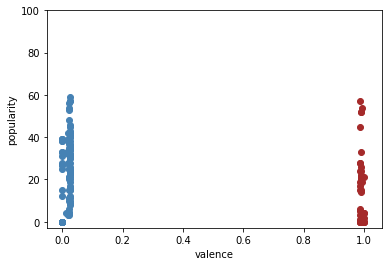

In [347]:
valence = dfNumeric['valence'].tolist()
X9 = np.array([[valence[i], popular[i]] for i in range(len(valence))])
mean_valence = np.mean(valence)
valenceQ3 = np.percentile(valence, 75)
valenceQ1 = np.percentile(valence, 25)
valenceIQR = valenceQ3 - valenceQ1


Y9_high = [1 if valence[i]>valenceQ3+0.77*valenceIQR else 0 for i in range(len(valence))]
Y9_low = [-1 if valence[i]<valenceQ1-0.5*valenceIQR else 0 for i in range(len(valence))]

X_valence_high, Y_valence_high = [], []
for i in range(len(Y9_high)):
    if Y9_high[i] == 1:
        X_valence_high.append(X9[i][0])
        Y_valence_high.append(X9[i][1])
        
X_valence_low, Y_valence_low = [], []
for i in range(len(Y9_low)):
    if Y9_low[i] == -1:
        X_valence_low.append(X9[i][0])
        Y_valence_low.append(X9[i][1])

# scatter plot 
plt.scatter(X_valence_high, Y_valence_high, color="brown")
plt.ylim(top=100)
plt.scatter(X_valence_low, Y_valence_low, color="steelblue")
plt.xlabel('valence')
plt.ylabel('popularity') 

In [348]:
tempo = dfNumeric['tempo'].tolist()
X0 = np.array([[tempo[i], popular[i]] for i in range(len(tempo))])
mean_valence = np.mean(valence)
tempoQ3 = np.percentile(tempo, 75)
tempoQ1 = np.percentile(tempo, 25)
tempoIQR = tempoQ3 - tempoQ1


Y0_high = [1 if tempo[i]>tempoQ3+1.7*tempoIQR else 0 for i in range(len(tempo))]
Y0_low = [-1 if tempo[i]<tempoQ1-1.2*tempoIQR else 0 for i in range(len(tempo))]

X_tempo_high, Y_tempo_high = [], []
for i in range(len(Y0_high)):
    if Y0_high[i] == 1:
        X_tempo_high.append(X0[i][0])
        Y_tempo_high.append(X0[i][1])
        
X_tempo_low, Y_tempo_low = [], []
for i in range(len(Y0_low)):
    if Y0_low[i] == -1:
        X_tempo_low.append(X0[i][0])
        Y_tempo_low.append(X0[i][1])
        
# scatter plot 
plt.scatter(X_tempo_high, Y_tempo_high, color="brown")
plt.ylim(top=100)
plt.scatter(X_tempo_low, Y_tempo_low, color="steelblue")
plt.xlabel('tempo')
plt.ylabel('popularity') 

Text(0, 0.5, 'popularity')

## Popular Genre Analysis

In [521]:
genrePopMean = df.groupby('genre', sort = True)['popularity'].mean()
genrePopMean.sort_values(ascending = False).head(5) 

genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.275256
Name: popularity, dtype: float64

### Genre = Pop

In [522]:
dfPop = df[df['genre']=='Pop']
dfPop.head()

genre    artist_name                                     track_name  \
107802   Pop  Ariana Grande       break up with your girlfriend, i'm bored   
107803   Pop    Post Malone                                           Wow.   
107804   Pop  Ariana Grande                                        7 rings   
107805   Pop        J. Cole                                   MIDDLE CHILD   
107806   Pop    Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   

                      track_id  popularity  acousticness  danceability  \
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
107803  6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107804  14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
107805  2JvzF1RMd7lE3KmFlsyZD8          96        0.1490         0.837   
107806  3KkXRkHbMCARz0aVfEt68P          97        0.5560         0.760   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
107802       190440   0.554          0.000000   F    0.1060    -5.290  Minor   
107803       149520   0.539          0.000002   B    0.1010    -7.399  Minor   
107804       178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
107805       213594   0.364          0.000000  G#    0.2710   -11.713  Major   
107806       158040   0.479          0.000000   D    0.0703    -5.574  Major   

        speechiness    tempo time_signature  valence  
107802       0.0917  169.999            4/4    0.335  
107803       0.1780   99.947            4/4    0.385  
107804       0.3230   70.142            4/4    0.319  
107805       0.2760  123.984            4/4    0.463  
107806       0.0466   89.911            4/4    0.913

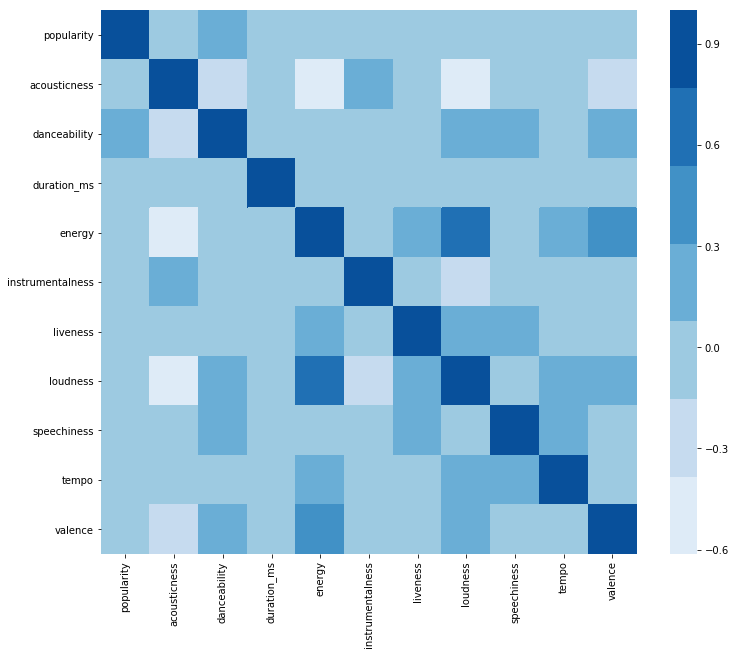

In [523]:
correlation = dfPop.corr().loc['popularity']

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = dfPop.corr().loc[a, b]
plt.figure(figsize=(12, 10))
cmap = sns.color_palette("Blues", 7)
sns.heatmap(corr, cmap=cmap)

In [423]:
dfRap = df[df['genre']=='Rap']
dfRap.head()

genre   artist_name                                     track_name  \
86951   Rap   Post Malone                                           Wow.   
86952   Rap       J. Cole                                   MIDDLE CHILD   
86953   Rap   Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
86954   Rap  Travis Scott                                     SICKO MODE   
86955   Rap     Meek Mill                        Going Bad (feat. Drake)   

                     track_id  popularity  acousticness  danceability  \
86951  6MWtB6iiXyIwun0YzU6DFP          99       0.16300         0.833   
86952  2JvzF1RMd7lE3KmFlsyZD8          96       0.14900         0.837   
86953  3KkXRkHbMCARz0aVfEt68P          97       0.55600         0.760   
86954  2xLMifQCjDGFmkHkpNLD9h          94       0.00513         0.834   
86955  2IRZnDFmlqMuOrYOLnZZyc          95       0.25900         0.889   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
86951       149520   0.539          0.000002   B    0.1010    -7.399  Minor   
86952       213594   0.364          0.000000  G#    0.2710   -11.713  Major   
86953       158040   0.479          0.000000   D    0.0703    -5.574  Major   
86954       312820   0.730          0.000000  G#    0.1240    -3.714  Major   
86955       180522   0.496          0.000000   E    0.2520    -6.365  Minor   

       speechiness    tempo time_signature  valence  
86951       0.1780   99.947            4/4    0.385  
86952       0.2760  123.984            4/4    0.463  
86953       0.0466   89.911            4/4    0.913  
86954       0.2220  155.008            4/4    0.446  
86955       0.0905   86.003            4/4    0.544

In [424]:
correlation = dfRap.corr().loc['popularity']

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = dfRap.corr().loc[a, b]
plt.figure(figsize=(12, 10))
cmap = sns.color_palette("Blues", 7)
sns.heatmap(corr, cmap=cmap)

In [425]:
dfRock = df[df['genre']=='Rock']
dfRock.head()

genre          artist_name             track_name  \
152988  Rock                Queen   We Are The Champions   
152989  Rock  Death Cab for Cutie              Black Sun   
152990  Rock         Demon Hunter             On My Side   
152991  Rock          Carole King  Bitter With The Sweet   
152992  Rock   Tenth Avenue North                   Worn   

                      track_id  popularity  acousticness  danceability  \
152988  4kzvAGJirpZ9ethvKZdJtg          50      0.230000         0.460   
152989  59FC22eN2Syt9bbv2d6393          55      0.170000         0.608   
152990  3zlqFHiuLAUra9MsJ85l4v          59      0.000005         0.480   
152991  6bMrfP9V5s5fgL3Z02tcES          64      0.807000         0.691   
152992  6jAAYLKxXPyeEoddXu6Gf7          54      0.384000         0.510   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
152988       180667   0.482          0.000000  A#    0.1010    -7.413  Major   
152989       289160   0.642          0.066700   D    0.1660    -7.978  Major   
152990       244387   0.953          0.066700  C#    0.0805    -5.061  Minor   
152991       148040   0.430          0.000508  G#    0.1150   -13.252  Major   
152992       244120   0.420          0.000000  F#    0.1020    -8.014  Major   

        speechiness    tempo time_signature  valence  
152988       0.0285   94.975            3/4    0.202  
152989       0.0251   87.703            4/4    0.608  
152990       0.0889   95.016            4/4    0.268  
152991       0.0576   99.032            4/4    0.690  
152992       0.0312  125.898            4/4    0.190

In [426]:
correlation = dfRock.corr().loc['popularity']

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = dfRock.corr().loc[a, b]
plt.figure(figsize=(12, 10))
cmap = sns.color_palette("Blues", 7)
sns.heatmap(corr, cmap=cmap)

In [427]:
dfHHop = df[df['genre']=='Hip-Hop']
dfHHop.head()

genre   artist_name               track_name                track_id  \
66607  Hip-Hop       J. Cole             MIDDLE CHILD  2JvzF1RMd7lE3KmFlsyZD8   
66608  Hip-Hop     Meek Mill  Going Bad (feat. Drake)  2IRZnDFmlqMuOrYOLnZZyc   
66609  Hip-Hop     21 Savage                    a lot  2t8yVaLvJ0RenpXUIAC52d   
66610  Hip-Hop  Rich The Kid                 Splashin  79OEIr4J4FHV0O3KrhaXRb   
66611  Hip-Hop     Sheck Wes                 Mo Bamba  1xzBco0xcoJEDXktl7Jxrr   

       popularity  acousticness  danceability  duration_ms  energy  \
66607          96       0.14900         0.837       213594   0.364   
66608          95       0.25900         0.889       180522   0.496   
66609          93       0.03950         0.837       288624   0.636   
66610          88       0.00195         0.942       177806   0.383   
66611          92       0.19400         0.729       183907   0.625   

       instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
66607           0.00000  G#    0.2710   -11.713  Major       0.2760  123.984   
66608           0.00000   E    0.2520    -6.365  Minor       0.0905   86.003   
66609           0.00125  C#    0.3420    -7.643  Major       0.0860  145.972   
66610           0.00000  A#    0.0922    -8.099  Major       0.5650  100.021   
66611           0.00986   E    0.2480    -5.266  Major       0.0315  146.034   

      time_signature  valence  
66607            4/4    0.463  
66608            4/4    0.544  
66609            4/4    0.274  
66610            4/4    0.380  
66611            4/4    0.261

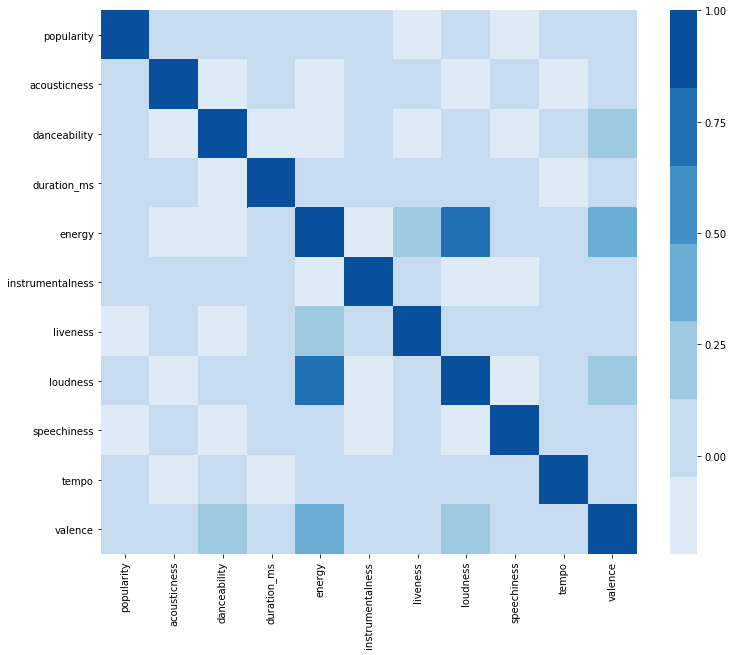

In [428]:
correlation = dfHHop.corr().loc['popularity']

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = dfHHop.corr().loc[a, b]
plt.figure(figsize=(12, 10))
cmap = sns.color_palette("Blues", 7)
sns.heatmap(corr, cmap=cmap)

In [429]:
dfDance = df[df['genre']=='Dance']
dfDance.head()

genre    artist_name                                track_name  \
9026  Dance  Ariana Grande  break up with your girlfriend, i'm bored   
9027  Dance  Ariana Grande                                   7 rings   
9028  Dance         Halsey                                Without Me   
9029  Dance  Ariana Grande                                     needy   
9030  Dance  Ariana Grande                                      NASA   

                    track_id  popularity  acousticness  danceability  \
9026  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
9027  14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
9028  5p7ujcrUXASCNwRaWNHR1C          97        0.2970         0.752   
9029  1TEL6MlSSVLSdhOSddidlJ          92        0.7800         0.647   
9030  4uTvPEr01pjTbZgl7jcKBD          91        0.4510         0.747   

      duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9026       190440   0.554          0.000000   F    0.1060    -5.290  Minor   
9027       178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
9028       201661   0.488          0.000009  F#    0.0936    -7.050  Major   
9029       171573   0.309          0.000007   G    0.2020    -7.948  Minor   
9030       182000   0.458          0.000000  F#    0.2520    -6.891  Major   

      speechiness    tempo time_signature  valence  
9026       0.0917  169.999            4/4    0.335  
9027       0.3230   70.142            4/4    0.319  
9028       0.0705  136.041            4/4    0.533  
9029       0.0366   87.045            4/4    0.195  
9030       0.3030   75.029            4/4    0.470

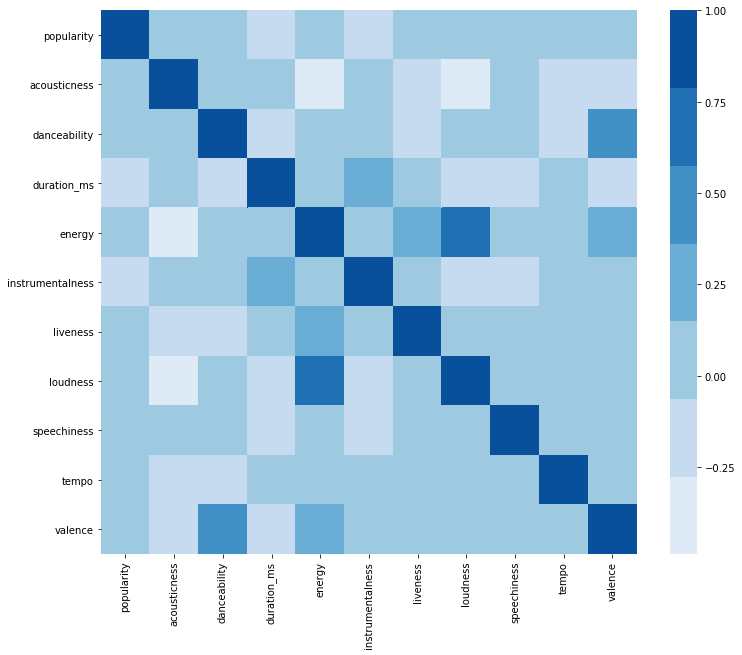

In [430]:
correlation = dfDance.corr().loc['popularity']

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = dfDance.corr().loc[a, b]
plt.figure(figsize=(12, 10))
cmap = sns.color_palette("Blues", 7)
sns.heatmap(corr, cmap=cmap)

## >90 popular song Analysis

In [4]:
dfTopSong = df[df['popularity'] > 90]
dfTopSong.head()

genre    artist_name                                track_name  \
9026  Dance  Ariana Grande  break up with your girlfriend, i'm bored   
9027  Dance  Ariana Grande                                   7 rings   
9028  Dance         Halsey                                Without Me   
9029  Dance  Ariana Grande                                     needy   
9030  Dance  Ariana Grande                                      NASA   

                    track_id  popularity  acousticness  danceability  \
9026  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
9027  14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
9028  5p7ujcrUXASCNwRaWNHR1C          97        0.2970         0.752   
9029  1TEL6MlSSVLSdhOSddidlJ          92        0.7800         0.647   
9030  4uTvPEr01pjTbZgl7jcKBD          91        0.4510         0.747   

      duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9026       190440   0.554          0.000000   F    0.1060    -5.290  Minor   
9027       178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
9028       201661   0.488          0.000009  F#    0.0936    -7.050  Major   
9029       171573   0.309          0.000007   G    0.2020    -7.948  Minor   
9030       182000   0.458          0.000000  F#    0.2520    -6.891  Major   

      speechiness    tempo time_signature  valence  
9026       0.0917  169.999            4/4    0.335  
9027       0.3230   70.142            4/4    0.319  
9028       0.0705  136.041            4/4    0.533  
9029       0.0366   87.045            4/4    0.195  
9030       0.3030   75.029            4/4    0.470

In [570]:
dfTopSong.boxplot(column='popularity', by='genre', figsize=(15,8))

In [571]:
print(dfTopSong['genre'].value_counts())
topMean = dfTopSong.groupby('genre', sort = True)['popularity'].mean()
topMean.sort_values(ascending = False) 

Pop           45
Rap           20
Dance         19
Hip-Hop       12
Reggaeton      6
R&B            2
Rock           1
Electronic     1
Indie          1
Name: genre, dtype: int64


genre
Indie         97.000000
Electronic    96.000000
Rock          95.000000
Reggaeton     94.500000
Pop           93.800000
Dance         93.684211
Hip-Hop       93.250000
Rap           92.900000
R&B           91.500000
Name: popularity, dtype: float64

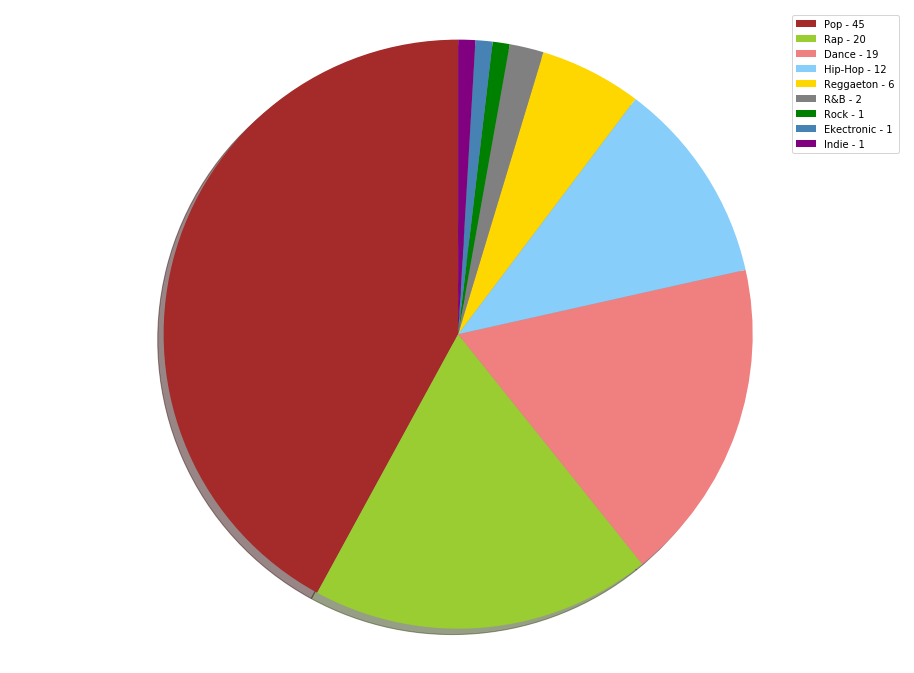

In [565]:
counts = list(dfTopSong['genre'].value_counts())

topMean = list((dfTopSong.groupby('genre', sort = True)['popularity'].mean()).sort_values(ascending = False))

# Data to plot
cat = ['Pop', 'Rap', 'Dance', 'Hip-Hop', 'Reggaeton', 'R&B', 'Rock', 'Ekectronic', "Indie"]
labels = [cat[i]+" - "+str(counts[i]) for i in range(len(counts))]
sizes = counts
colors = ['brown', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'grey', "green", "steelblue", 'purple']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
fig1, ax1 = plt.subplots(figsize=(16, 12))
patches, texts = ax1.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()


# Clean data, make groups
## Get rid of id, make key, mode, time_signature numerical

In [103]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [104]:
dfClean = df.drop(['track_name', 'track_id'], axis=1)
dfClean.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0         0.611         0.389   
1  Movie  Martin & les fées           1         0.246         0.590   
2  Movie    Joseph Williams           3         0.952         0.663   
3  Movie     Henri Salvador           0         0.703         0.240   
4  Movie       Fabien Nataf           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [105]:
keys = dfClean['key'].unique()
print(keys)

['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']


- C -- 0 
- C# -- 0.5
- D -- 1
- D# -- 1.5
- E -- 2
- E# --  (not exist)
- F -- 2.5
- F# -- 3
- G -- 3.5
- G# -- 4
- A -- 4.5
- A# -- 5
- B -- 5.5
- B# --  (not exist)

In [106]:
mapKey = {'C':0,'C#':0.5,'D':1,'D#':1.5,'E':2,'F':2.5,'F#':3,'G':3.5,'G#':4,'A':4.5,'A#':5,'B':5.5}
df1 = dfClean.replace({'key': mapKey})
df1.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0         0.611         0.389   
1  Movie  Martin & les fées           1         0.246         0.590   
2  Movie    Joseph Williams           3         0.952         0.663   
3  Movie     Henri Salvador           0         0.703         0.240   
4  Movie       Fabien Nataf           4         0.950         0.331   

   duration_ms  energy  instrumentalness  key  liveness  loudness   mode  \
0        99373   0.910             0.000  0.5    0.3460    -1.828  Major   
1       137373   0.737             0.000  3.0    0.1510    -5.559  Minor   
2       170267   0.131             0.000  0.0    0.1030   -13.879  Minor   
3       152427   0.326             0.000  0.5    0.0985   -12.178  Major   
4        82625   0.225             0.123  2.5    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

- Major: 1
- Minor: 0

In [107]:
mapMode = {'Major':1, 'Minor':0}
df2 = df1.replace({'mode': mapMode})
df2.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0         0.611         0.389   
1  Movie  Martin & les fées           1         0.246         0.590   
2  Movie    Joseph Williams           3         0.952         0.663   
3  Movie     Henri Salvador           0         0.703         0.240   
4  Movie       Fabien Nataf           4         0.950         0.331   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0        99373   0.910             0.000  0.5    0.3460    -1.828     1   
1       137373   0.737             0.000  3.0    0.1510    -5.559     0   
2       170267   0.131             0.000  0.0    0.1030   -13.879     0   
3       152427   0.326             0.000  0.5    0.0985   -12.178     1   
4        82625   0.225             0.123  2.5    0.2020   -21.150     1   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [108]:
df2['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [306]:
mapSig = {'0/4':0, '1/4':1, '2/4':2, '3/4':3, "4/4":4, "5/4":5}
df3 = df2.replace({'time_signature': mapSig})
df3.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0         0.611         0.389   
1  Movie  Martin & les fées           1         0.246         0.590   
2  Movie    Joseph Williams           3         0.952         0.663   
3  Movie     Henri Salvador           0         0.703         0.240   
4  Movie       Fabien Nataf           4         0.950         0.331   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0        99373   0.910             0.000  0.5    0.3460    -1.828     1   
1       137373   0.737             0.000  3.0    0.1510    -5.559     0   
2       170267   0.131             0.000  0.0    0.1030   -13.879     0   
3       152427   0.326             0.000  0.5    0.0985   -12.178     1   
4        82625   0.225             0.123  2.5    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup acousticness
- original 0-1
- after: 1-5 5 groups

In [307]:
# print(df4["acousticness"].min(), df4["acousticness"].max())
# df5 = df4
print(df3["acousticness"].min(), df3["acousticness"].max())
df5 = df3

0.0 0.996


In [308]:
df5['acousticness'] = np.where(df5['acousticness'] < 0.2, 1, df5['acousticness'])
df5['acousticness'] = np.where(df5['acousticness'] < 0.4, 2, df5['acousticness'])
df5['acousticness'] = np.where(df5['acousticness'] < 0.6, 3, df5['acousticness'])
df5['acousticness'] = np.where(df5['acousticness'] < 0.8, 4, df5['acousticness'])
df5['acousticness'] = np.where(df5['acousticness'] < 1.0, 5, df5['acousticness'])

df5.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0         0.389   
1  Movie  Martin & les fées           1           2.0         0.590   
2  Movie    Joseph Williams           3           5.0         0.663   
3  Movie     Henri Salvador           0           4.0         0.240   
4  Movie       Fabien Nataf           4           5.0         0.331   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0        99373   0.910             0.000  0.5    0.3460    -1.828     1   
1       137373   0.737             0.000  3.0    0.1510    -5.559     0   
2       170267   0.131             0.000  0.0    0.1030   -13.879     0   
3       152427   0.326             0.000  0.5    0.0985   -12.178     1   
4        82625   0.225             0.123  2.5    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup danceability
- original about 0-1
- after group 1-5

In [309]:
print(df5["danceability"].min(), df5["danceability"].max())
df6 = df5

0.0569 0.9890000000000001


In [310]:
df6['danceability'] = np.where(df6['danceability'] < 0.2, 1, df6['danceability'])
df6['danceability'] = np.where(df6['danceability'] < 0.4, 2, df6['danceability'])
df6['danceability'] = np.where(df6['danceability'] < 0.6, 3, df6['danceability'])
df6['danceability'] = np.where(df6['danceability'] < 0.8, 4, df6['danceability'])
df6['danceability'] = np.where(df6['danceability'] < 1.0, 5, df6['danceability'])

df6.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0        99373   0.910             0.000  0.5    0.3460    -1.828     1   
1       137373   0.737             0.000  3.0    0.1510    -5.559     0   
2       170267   0.131             0.000  0.0    0.1030   -13.879     0   
3       152427   0.326             0.000  0.5    0.0985   -12.178     1   
4        82625   0.225             0.123  2.5    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup duration

In [311]:
print(df6['duration_ms'].min(), df6['duration_ms'].max(), np.quantile(df6['duration_ms'], 0.2),np.quantile(df6['duration_ms'], 0.4),np.quantile(df6['duration_ms'], 0.6),np.quantile(df6['duration_ms'], 0.8))
df7 = df6

15387 5552917 172612.2 206440.0 235627.0 280320.0


In [312]:
df7['duration_ms'] = np.where(df7['duration_ms'] < 170001, 1, df7['duration_ms'])
df7['duration_ms'] = np.where((df7['duration_ms']<200001) & (df7['duration_ms']>170000), 2, df7['duration_ms'])
df7['duration_ms'] = np.where((df7['duration_ms']<230001) & (df7['duration_ms']>200000), 3, df7['duration_ms'])
df7['duration_ms'] = np.where((df7['duration_ms']<280001) & (df7['duration_ms']>230000), 4, df7['duration_ms'])
df7['duration_ms'] = np.where(df7['duration_ms']>280001, 5, df7['duration_ms'])

df7.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1   0.910             0.000  0.5    0.3460    -1.828     1   
1            1   0.737             0.000  3.0    0.1510    -5.559     0   
2            2   0.131             0.000  0.0    0.1030   -13.879     0   
3            1   0.326             0.000  0.5    0.0985   -12.178     1   
4            1   0.225             0.123  2.5    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup energy

In [313]:
print(df7['energy'].min(), df7['energy'].max())
df8 = df7

2.0300000000000002e-05 0.9990000000000001


In [314]:
df8['energy'] = np.where(df8['energy'] < 0.2, 1, df8['energy'])
df8['energy'] = np.where(df8['energy'] < 0.4, 2, df8['energy'])
df8['energy'] = np.where(df8['energy'] < 0.6, 3, df8['energy'])
df8['energy'] = np.where(df8['energy'] < 0.8, 4, df8['energy'])
df8['energy'] = np.where(df8['energy'] < 1.0, 5, df8['energy'])

df8.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0             0.000  0.5    0.3460    -1.828     1   
1            1     4.0             0.000  3.0    0.1510    -5.559     0   
2            2     1.0             0.000  0.0    0.1030   -13.879     0   
3            1     2.0             0.000  0.5    0.0985   -12.178     1   
4            1     2.0             0.123  2.5    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup Instrumentalness

In [315]:
print(df8['instrumentalness'].min(), df8['instrumentalness'].max())
df9 = df8

0.0 0.9990000000000001


In [316]:
df9['instrumentalness'] = np.where(df9['instrumentalness'] < 0.2, 1, df9['instrumentalness'])
df9['instrumentalness'] = np.where(df9['instrumentalness'] < 0.4, 2, df9['instrumentalness'])
df9['instrumentalness'] = np.where(df9['instrumentalness'] < 0.6, 3, df9['instrumentalness'])
df9['instrumentalness'] = np.where(df9['instrumentalness'] < 0.8, 4, df9['instrumentalness'])
df9['instrumentalness'] = np.where(df9['instrumentalness'] < 1.0, 5, df9['instrumentalness'])

df9.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5    0.3460    -1.828     1   
1            1     4.0               1.0  3.0    0.1510    -5.559     0   
2            2     1.0               1.0  0.0    0.1030   -13.879     0   
3            1     2.0               1.0  0.5    0.0985   -12.178     1   
4            1     2.0               1.0  2.5    0.2020   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup Liveness

In [317]:
print(df9['liveness'].min(), df9['liveness'].max())
df10 = df9

0.00967 1.0


In [318]:
df10['liveness'] = np.where(df10['liveness'] == 1, 5, df10['liveness'])
df10['liveness'] = np.where(df10['liveness'] < 0.2, 1, df10['liveness'])
df10['liveness'] = np.where(df10['liveness'] < 0.4, 2, df10['liveness'])
df10['liveness'] = np.where(df10['liveness'] < 0.6, 3, df10['liveness'])
df10['liveness'] = np.where(df10['liveness'] < 0.8, 4, df10['liveness'])
df10['liveness'] = np.where(df10['liveness'] < 1.0, 5, df10['liveness'])

df10.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5       2.0    -1.828     1   
1            1     4.0               1.0  3.0       1.0    -5.559     0   
2            2     1.0               1.0  0.0       1.0   -13.879     0   
3            1     2.0               1.0  0.5       1.0   -12.178     1   
4            1     2.0               1.0  2.5       2.0   -21.150     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

## Regroup Loudness

In [319]:
print(df10['loudness'].min(), df10['loudness'].max())
df11 = df10

-52.457 3.7439999999999998


In [320]:
df11['loudness'] = np.where((df11['loudness'] < 5) & (df11['loudness'] > -7), 5, df11['loudness'])
df11['loudness'] = np.where(df11['loudness'] < -39, 1, df11['loudness'])
df11['loudness'] = np.where(df11['loudness'] < -28, 2, df11['loudness'])
df11['loudness'] = np.where(df11['loudness'] < -17, 3, df11['loudness'])
df11['loudness'] = np.where(df11['loudness'] < -6, 4, df11['loudness'])

df11.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5       2.0       5.0     1   
1            1     4.0               1.0  3.0       1.0       5.0     0   
2            2     1.0               1.0  0.0       1.0       4.0     0   
3            1     2.0               1.0  0.5       1.0       4.0     1   
4            1     2.0               1.0  2.5       2.0       3.0     1   

   speechiness    tempo  time_signature  valence  
0       0.0525  166.969               4    0.814  
1       0.0868  174.003               4    0.816  
2       0.0362   99.488               5    0.368  
3       0.0395  171.758               4    0.227  
4       0.0456  140.576               4    0.390

In [321]:
print(df11['speechiness'].min(), df11['speechiness'].max())
df12 = df11

0.0222 0.9670000000000001


In [322]:
df12['speechiness'] = np.where(df12['speechiness'] < 0.2, 1, df12['speechiness'])
df12['speechiness'] = np.where(df12['speechiness'] < 0.4, 2, df12['speechiness'])
df12['speechiness'] = np.where(df12['speechiness'] < 0.6, 3, df12['speechiness'])
df12['speechiness'] = np.where(df12['speechiness'] < 0.8, 4, df12['speechiness'])
df12['speechiness'] = np.where(df12['speechiness'] < 1.0, 5, df12['speechiness'])

df12.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5       2.0       5.0     1   
1            1     4.0               1.0  3.0       1.0       5.0     0   
2            2     1.0               1.0  0.0       1.0       4.0     0   
3            1     2.0               1.0  0.5       1.0       4.0     1   
4            1     2.0               1.0  2.5       2.0       3.0     1   

   speechiness    tempo  time_signature  valence  
0          1.0  166.969               4    0.814  
1          1.0  174.003               4    0.816  
2          1.0   99.488               5    0.368  
3          1.0  171.758               4    0.227  
4          1.0  140.576               4    0.390

In [323]:
print(df12['tempo'].min(), df12['tempo'].max())
df13 = df12

30.379 242.903


In [324]:
df13['tempo'] = np.where(df13['tempo'] < 72, 1000, df13['tempo'])
df13['tempo'] = np.where(df13['tempo'] < 115, 2000, df13['tempo'])
df13['tempo'] = np.where(df13['tempo'] < 158, 3000, df13['tempo'])
df13['tempo'] = np.where(df13['tempo'] < 201, 4000, df13['tempo'])
df13['tempo'] = np.where(df13['tempo'] < 244, 5000, df13['tempo'])

df13.head(50)

genre           artist_name  popularity  acousticness  danceability  \
0   Movie        Henri Salvador           0           4.0           2.0   
1   Movie     Martin & les fées           1           2.0           3.0   
2   Movie       Joseph Williams           3           5.0           4.0   
3   Movie        Henri Salvador           0           4.0           2.0   
4   Movie          Fabien Nataf           4           5.0           2.0   
5   Movie        Henri Salvador           0           4.0           3.0   
6   Movie     Martin & les fées           2           2.0           4.0   
7   Movie           Laura Mayne          15           5.0           3.0   
8   Movie                Chorus           0           1.0           4.0   
9   Movie   Le Club des Juniors          10           2.0           3.0   
10  Movie     Leopold Stokowski           0           5.0           1.0   
11  Movie          Randy Newman           2           1.0           2.0   
12  Movie  Idoles De La Musique           4           2.0           4.0   
13  Movie                Chorus           3           5.0           4.0   
14  Movie    Richard M. Sherman           0           5.0           3.0   
15  Movie           Michel Roux           0           3.0           3.0   
16  Movie    Jean Claude Corbel           0           4.0           4.0   
17  Movie         Bernard Minet           3           3.0           4.0   
18  Movie        Henri Salvador           1           2.0           3.0   
19  Movie                Amalya           4           1.0           3.0   
20  Movie     Martin & les fées           1           5.0           2.0   
21  Movie              Dorothée           1           3.0           5.0   
22  Movie        Henri Salvador           8           4.0           4.0   
23  Movie    Jean Claude Corbel           0           4.0           4.0   
24  Movie        Henri Salvador           5           4.0           3.0   
25  Movie             Jean Piat           0           5.0           4.0   
26  Movie        Henri Salvador           0           1.0           4.0   
27  Movie          Lucie Dolene           0           5.0           3.0   
28  Movie        Henri Salvador           2           4.0           5.0   
29  Movie                Chorus           0           1.0           4.0   
30  Movie                Chorus           0           1.0           4.0   
31  Movie     Martin & les fées           4           2.0           4.0   
32  Movie        Henri Salvador           0           5.0           4.0   
33  Movie        Henri Salvador           0           5.0           5.0   
34  Movie                Chorus           0           1.0           4.0   
35  Movie        Henri Salvador           0           4.0           4.0   
36  Movie                Chorus           0           1.0           5.0   
37  Movie        Henri Salvador           1           4.0           3.0   
38  Movie    Richard M. Sherman           0           5.0           2.0   
39  Movie           Larry Groce           0           3.0           3.0   
40  Movie                Chorus           0           4.0           3.0   
41  Movie     Leopold Stokowski           1           5.0           3.0   
42  Movie        Henri Salvador           0           5.0           2.0   
43  Movie         Patrick Rocca           1           3.0           3.0   
44  Movie              Ken Page           0           4.0           3.0   
45  Movie              Ken Page           0           4.0           3.0   
46  Movie         Bernard Minet           4           1.0           4.0   
47  Movie          Debbie Davis           3           2.0           3.0   
48  Movie        Henri Salvador           0           4.0           5.0   
49  Movie              Dorothée           1           3.0           5.0   

    duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0             1     5.0               1.0  0.5       2.0       5.0     1   
1             1     4.0   

In [325]:
print(df13['valence'].min(), df13['valence'].max())
df14 = df13

0.0 1.0


In [326]:
df14['valence'] = np.where(df14['valence'] == 1, 5, df14['valence'])
df14['valence'] = np.where(df14['valence'] < 0.2, 1, df14['valence'])
df14['valence'] = np.where(df14['valence'] < 0.4, 2, df14['valence'])
df14['valence'] = np.where(df14['valence'] < 0.6, 3, df14['valence'])
df14['valence'] = np.where(df14['valence'] < 0.8, 4, df14['valence'])
df14['valence'] = np.where(df14['valence'] < 1.0, 5, df14['valence'])

df14.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5       2.0       5.0     1   
1            1     4.0               1.0  3.0       1.0       5.0     0   
2            2     1.0               1.0  0.0       1.0       4.0     0   
3            1     2.0               1.0  0.5       1.0       4.0     1   
4            1     2.0               1.0  2.5       2.0       3.0     1   

   speechiness   tempo  time_signature  valence  
0          1.0  4000.0               4      5.0  
1          1.0  4000.0               4      5.0  
2          1.0  2000.0               5      2.0  
3          1.0  4000.0               4      2.0  
4          1.0  3000.0               4      2.0

In [327]:
dfSpotify = df14
dfSpotify.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5       2.0       5.0     1   
1            1     4.0               1.0  3.0       1.0       5.0     0   
2            2     1.0               1.0  0.0       1.0       4.0     0   
3            1     2.0               1.0  0.5       1.0       4.0     1   
4            1     2.0               1.0  2.5       2.0       3.0     1   

   speechiness   tempo  time_signature  valence  
0          1.0  4000.0               4      5.0  
1          1.0  4000.0               4      5.0  
2          1.0  2000.0               5      2.0  
3          1.0  4000.0               4      2.0  
4          1.0  3000.0               4      2.0

Correlation between single feature and Popularity is:
popularity          1.000000
acousticness       -0.382132
danceability        0.243675
duration_ms         0.104261
energy              0.248417
instrumentalness   -0.207690
key                 0.012190
liveness           -0.165740
loudness            0.329266
mode               -0.070550
speechiness        -0.164508
tempo               0.075425
time_signature      0.142269
valence             0.054363
Name: popularity, dtype: float64


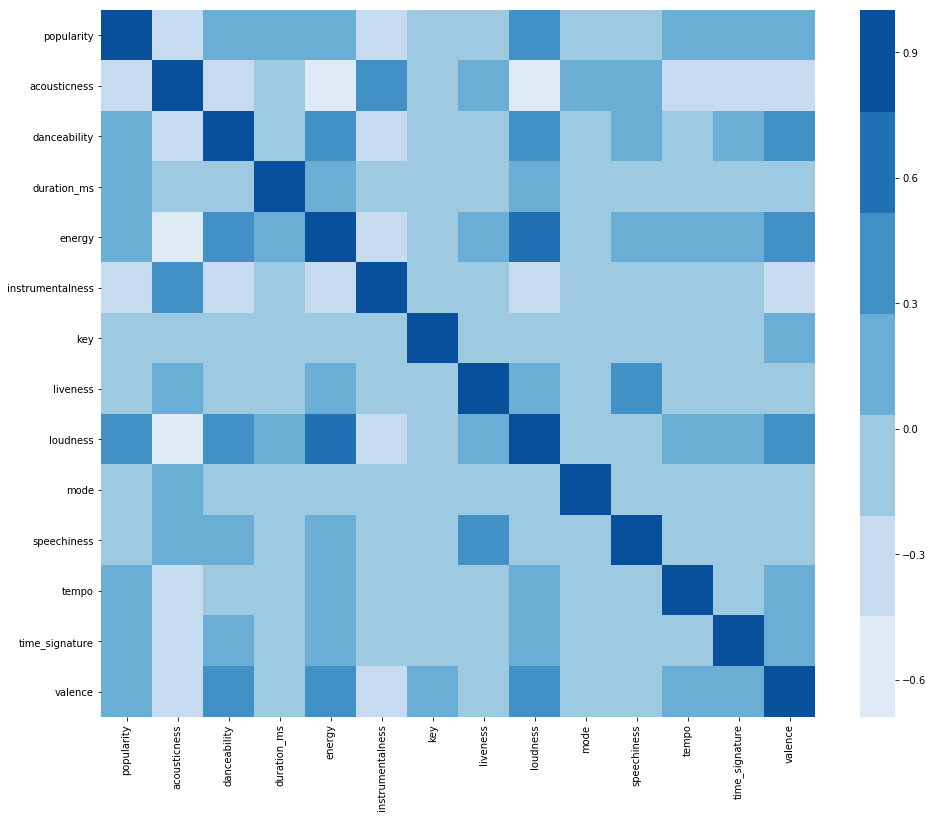

In [328]:
print("Correlation between single feature and Popularity is:")
correlation = dfSpotify.corr().loc['popularity']
print(correlation)

corr = pd.DataFrame()
for a in list(correlation.keys()):
    for b in list(correlation.keys()):
        corr.loc[a, b] = dfSpotify.corr().loc[a, b]
plt.figure(figsize=(16, 13))
cmap = sns.color_palette("Blues", 7)
sns.heatmap(corr, cmap=cmap)

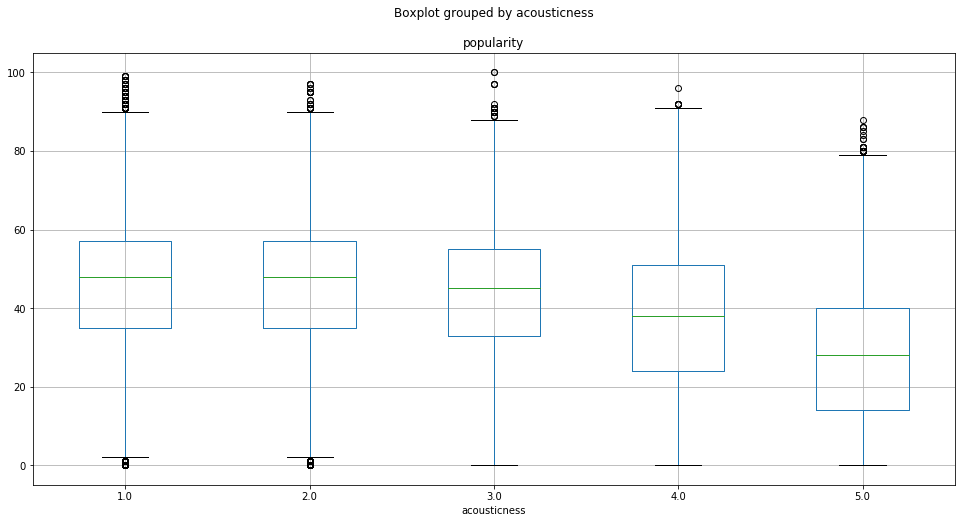

In [329]:
dfSpotify.boxplot(column='popularity', by='acousticness', figsize=(16,8)) 

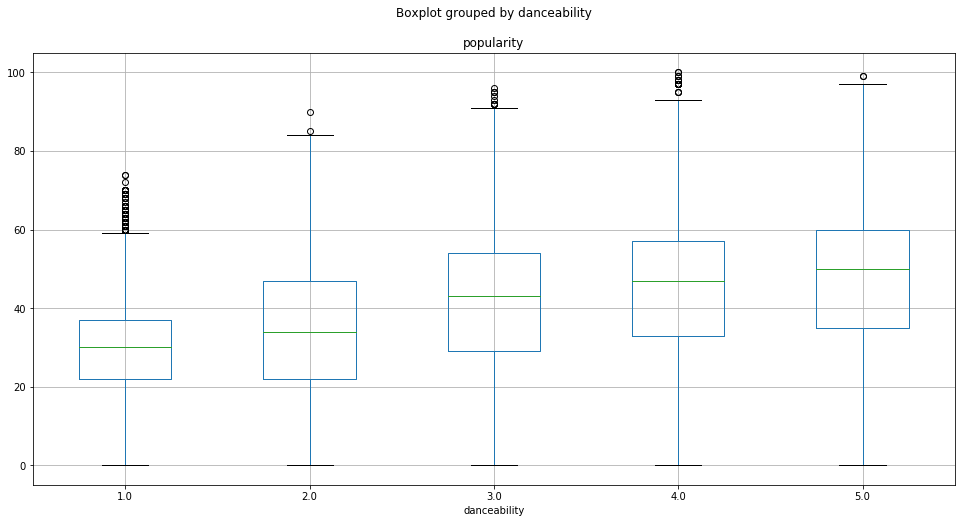

In [330]:
dfSpotify.boxplot(column='popularity', by='danceability', figsize=(16,8)) 

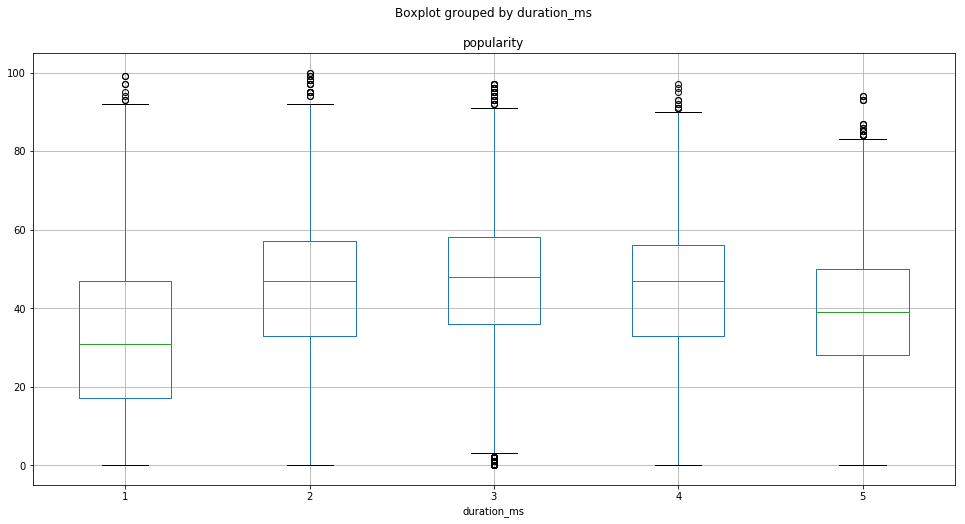

In [331]:
dfSpotify.boxplot(column='popularity', by='duration_ms', figsize=(16,8)) 

In [332]:
dfSpotify.boxplot(column='popularity', by='energy', figsize=(16,8)) 

In [333]:
dfSpotify.boxplot(column='popularity', by='instrumentalness', figsize=(16,8)) 

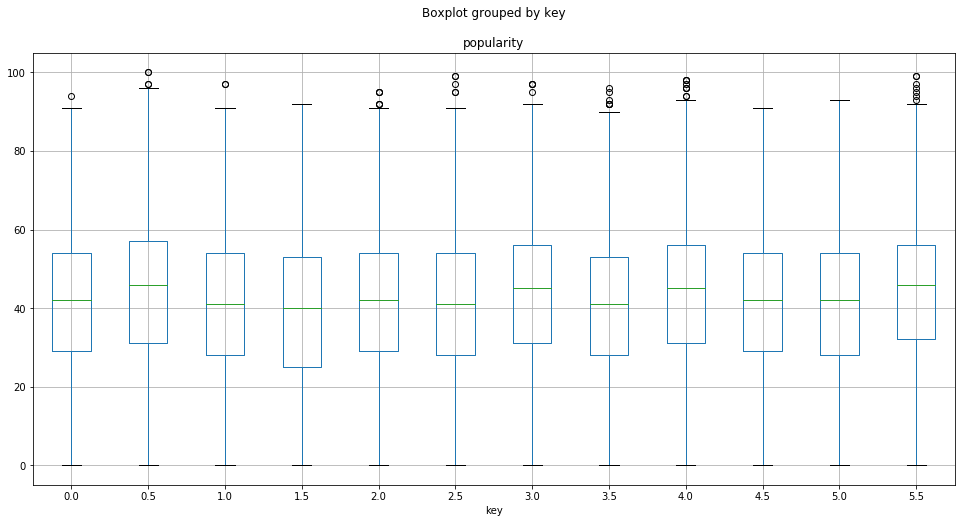

In [334]:
dfSpotify.boxplot(column='popularity', by='key', figsize=(16,8)) 

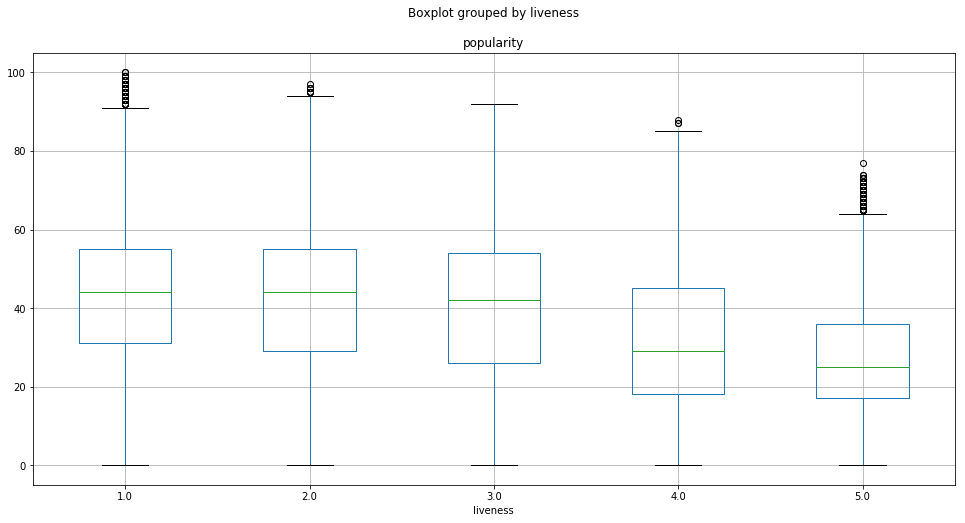

In [335]:
dfSpotify.boxplot(column='popularity', by='liveness', figsize=(16,8)) 

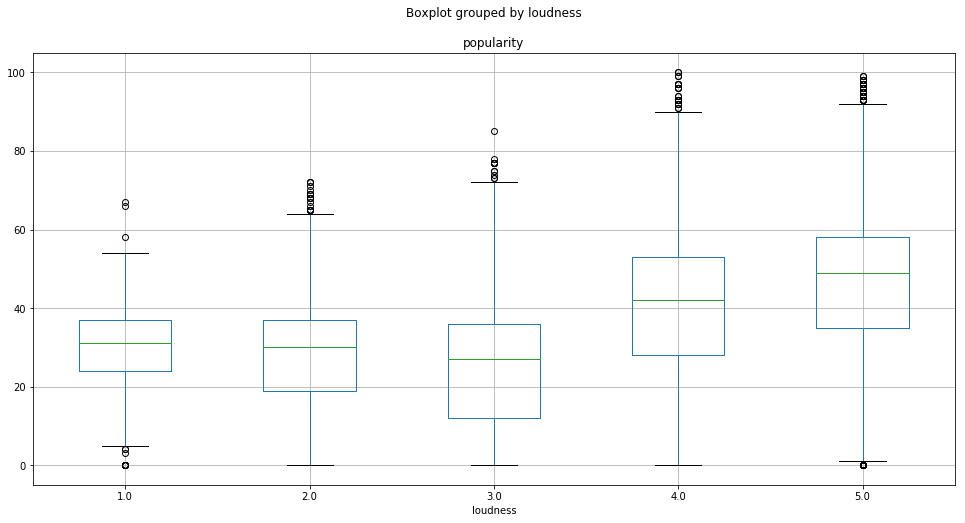

In [336]:
dfSpotify.boxplot(column='popularity', by='loudness', figsize=(16,8)) 

In [337]:
dfSpotify.boxplot(column='popularity', by='mode', figsize=(16,8)) 

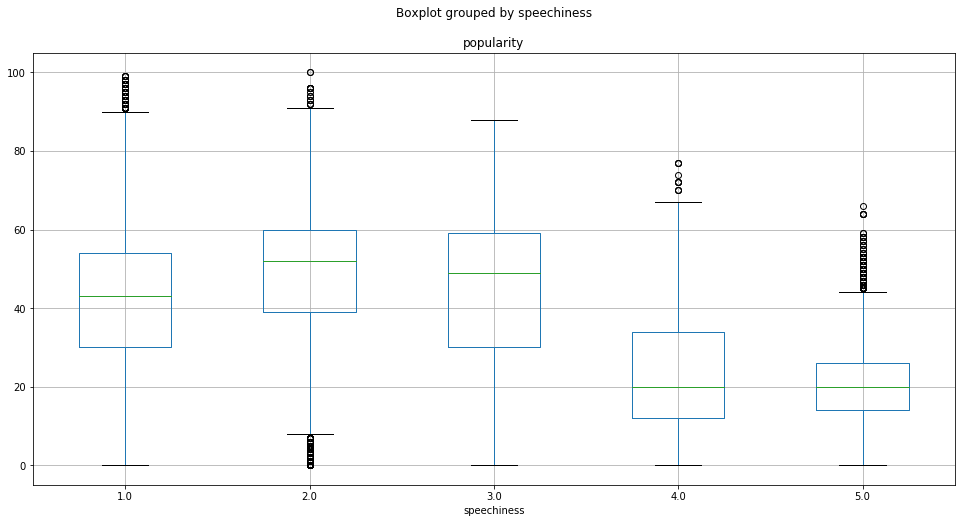

In [338]:
dfSpotify.boxplot(column='popularity', by='speechiness', figsize=(16,8)) 

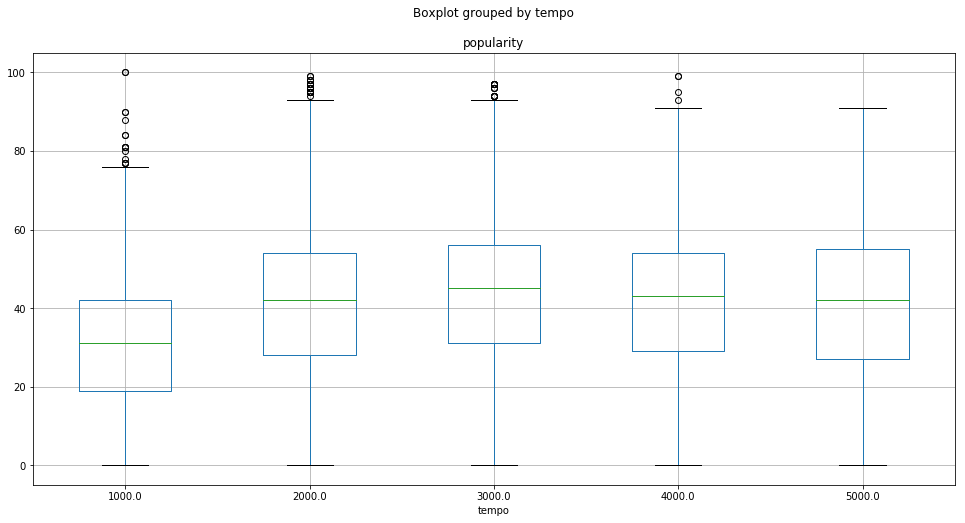

In [339]:
dfSpotify.boxplot(column='popularity', by='tempo', figsize=(16,8)) 

In [340]:
dfSpotify.boxplot(column='popularity', by='time_signature', figsize=(16,8)) 

In [341]:
dfSpotify.boxplot(column='popularity', by='valence', figsize=(16,8)) 

## Multilinear-regression songs popularity >90
Danceability, instrumentalness, Loudness, time_signature, valence -> positive correlation

In [342]:
dfTopSong = dfSpotify[dfSpotify['popularity'] > 90]
dfTopSong = dfTopSong.select_dtypes([np.number])
cols = dfTopSong.columns.tolist()
cols = cols[1:] + cols[:1]
dfTopSong = dfTopSong[cols]
dfTopSong.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
9026           1.0           4.0            2     3.0               1.0  2.5   
9027           3.0           4.0            2     2.0               1.0  0.5   
9028           2.0           4.0            3     3.0               1.0  3.0   
9029           4.0           4.0            2     2.0               1.0  3.5   
9030           3.0           4.0            2     3.0               1.0  3.0   

      liveness  loudness  mode  speechiness   tempo  time_signature  valence  \
9026       1.0       5.0     0          1.0  4000.0               4      2.0   
9027       1.0       4.0     0          2.0  1000.0               4      2.0   
9028       1.0       4.0     1          1.0  3000.0               4      3.0   
9029       2.0       4.0     0          1.0  2000.0               4      1.0   
9030       2.0       5.0     1          2.0  2000.0               4      3.0   

      popularity  
9026          99  
9027         100  
9028          97  
9029          92  
9030          91

In [343]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfTopSong.iloc[:,-1], dfTopSong.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.354
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000612
Time:                        21:18:31   Log-Likelihood:                -234.87
No. Observations:                 107   AIC:                             493.7
Df Residuals:                      95   BIC:                             525.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7682      0.296     -2.593      0.011      -1.356      -0.180
x2             0.3991      0.351      1.138      0.258      -0.297       1.095
x3            -0.2700      0.245     -1.100      0.274      -0.757       0.217
x4            -0.6281      0.358     -1.752      0.083      -1.340       0.083
const          6.3152      0.243     25.969      0.000       5.832       6.798
x5             0.0569      0.136      0.420      0.676      -0.212       0.326
x6            -1.2948      0.461     -2.810      0.006      -2.210      -0.380
x7            -1.8100      0.660     -2.741      0.007      -3.121      -0.499
x8             0.1078      0.496      0.217      0.828      -0.877       1.092
x9            -0.2671      0.606     -0.441      0.661      -1.471       0.937
x10           -0.0007      0.000     -1.844      0.068      -0.001    5.11e-05
x11           25.2609      0.973     25.969      0.000      23.330      27.192
x12            0.3819      0.279      1.369      0.174      -0.172       0.936
==============================================================================
Omnibus:                        1.860   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.899
Skew:                           0.278   Prob(JB):                        0.387
Kurtosis:                       2.660   Cond. No.                     6.05e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Top Pop Songs
Danceability, loudness, valence

In [356]:
dfTopPop = dfSpotify[dfSpotify['genre'] == "Pop"]
dfTopPop = dfTopPop[dfTopPop['popularity'] > 80]
dfTopPop = dfTopPop.select_dtypes([np.number])
cols = dfTopPop.columns.tolist()
cols = cols[1:] + cols[:1]
dfTopPop = dfTopPop[cols]
dfTopPop.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
107802           1.0           4.0            2     3.0               1.0   
107803           1.0           5.0            1     3.0               1.0   
107804           3.0           4.0            2     2.0               1.0   
107805           1.0           5.0            3     2.0               1.0   
107806           3.0           4.0            1     3.0               1.0   

        key  liveness  loudness  mode  speechiness   tempo  time_signature  \
107802  2.5       1.0       5.0     0          1.0  4000.0               4   
107803  5.5       1.0       4.0     0          1.0  2000.0               4   
107804  0.5       1.0       4.0     0          2.0  1000.0               4   
107805  4.0       2.0       4.0     1          2.0  3000.0               4   
107806  1.0       1.0       5.0     1          1.0  2000.0               4   

        valence  popularity  
107802      2.0          99  
107803      2.0          99  
107804      2.0         100  
107805      3.0          96  
107806      5.0          97

In [357]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfTopPop.iloc[:,-1], dfTopPop.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.037
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0173
Time:                        22:46:48   Log-Likelihood:                -1030.0
No. Observations:                 371   AIC:                             2088.
Df Residuals:                     357   BIC:                             2143.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.5783      5.815     15.750      0.000      80.143     103.014
x1            -0.2643      0.250     -1.056      0.292      -0.757       0.228
x2             0.3905      0.331      1.179      0.239      -0.261       1.042
x3            -0.7162      0.220     -3.261      0.001      -1.148      -0.284
x4            -0.8185      0.324     -2.524      0.012      -1.456      -0.181
x5            -1.5812      1.666     -0.949      0.343      -4.859       1.696
x6            -0.0290      0.111     -0.262      0.793      -0.247       0.189
x7            -0.0279      0.343     -0.081      0.935      -0.703       0.647
x8             0.2278      0.566      0.403      0.687      -0.884       1.340
x9            -0.4097      0.434     -0.945      0.345      -1.262       0.443
x10           -0.6359      0.493     -1.289      0.198      -1.606       0.334
x11           -0.0003      0.000     -0.982      0.327      -0.001       0.000
x12           -0.0019      1.141     -0.002      0.999      -2.246       2.243
x13            0.0058      0.216      0.027      0.979      -0.419       0.431
==============================================================================
Omnibus:                       72.555   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.344
Skew:                           1.208   Prob(JB):                     2.44e-25
Kurtosis:                       4.223   Cond. No.                     7.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Top Rap Song 
Danceability, instrumentalness, key, liveness, time_signagure, valence

In [358]:
dfTopRap = dfSpotify[dfSpotify['genre'] == "Rap"]
dfTopRap = dfTopRap[dfTopRap['popularity'] > 80]
dfTopRap = dfTopRap.select_dtypes([np.number])
cols = dfTopRap.columns.tolist()
cols = cols[1:] + cols[:1]
dfTopRap = dfTopRap[cols]
dfTopRap.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
86951           1.0           5.0            1     3.0               1.0  5.5   
86952           1.0           5.0            3     2.0               1.0  4.0   
86953           3.0           4.0            1     3.0               1.0  1.0   
86954           1.0           5.0            5     4.0               1.0  4.0   
86955           2.0           5.0            2     3.0               1.0  2.0   

       liveness  loudness  mode  speechiness   tempo  time_signature  valence  \
86951       1.0       4.0     0          1.0  2000.0               4      2.0   
86952       2.0       4.0     1          2.0  3000.0               4      3.0   
86953       1.0       5.0     1          1.0  2000.0               4      5.0   
86954       1.0       5.0     1          2.0  3000.0               4      3.0   
86955       2.0       5.0     0          1.0  2000.0               4      3.0   

       popularity  
86951          99  
86952          96  
86953          97  
86954          94  
86955          95

In [359]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfTopRap.iloc[:,-1], dfTopRap.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.525
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.120
Time:                        22:46:56   Log-Likelihood:                -464.32
No. Observations:                 172   AIC:                             954.6
Df Residuals:                     159   BIC:                             995.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0518      0.371     -0.140      0.889      -0.785       0.681
x2             0.4669      0.472      0.990      0.324      -0.465       1.399
x3            -0.4095      0.247     -1.657      0.100      -0.898       0.079
x4            -1.0865      0.489     -2.223      0.028      -2.052      -0.121
const         81.9099      9.080      9.021      0.000      63.977      99.843
x5             0.0684      0.161      0.425      0.671      -0.249       0.386
x6             0.5550      0.500      1.111      0.268      -0.432       1.542
x7             0.8837      0.751      1.177      0.241      -0.599       2.366
x8            -0.3713      0.607     -0.612      0.541      -1.569       0.827
x9            -0.7120      0.546     -1.305      0.194      -1.790       0.366
x10           -0.0003      0.000     -0.785      0.434      -0.001       0.000
x11            0.7321      1.919      0.381      0.703      -3.058       4.523
x12            0.0871      0.308      0.283      0.778      -0.522       0.696
==============================================================================
Omnibus:                       25.814   Durbin-Watson:                   0.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.174
Skew:                           0.999   Prob(JB):                     1.03e-07
Kurtosis:                       3.707   Cond. No.                     9.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Top Rock Song
- danceability, energy, speechiness, temppo, time_signature, valence

In [360]:
dfTopRock = dfSpotify[dfSpotify['genre'] == "Rock"]
dfTopRock = dfTopRock[dfTopRock['popularity'] > 80]
dfTopRock = dfTopRock.select_dtypes([np.number])
cols = dfTopRock.columns.tolist()
cols = cols[1:] + cols[:1]
dfTopRock = dfTopRock[cols]
dfTopRock.head()

acousticness  danceability  duration_ms  energy  instrumentalness  \
166057           1.0           3.0            2     5.0               1.0   
166058           2.0           2.0            5     2.0               1.0   
166059           1.0           3.0            3     5.0               1.0   
166060           1.0           3.0            4     5.0               1.0   
166061           2.0           4.0            2     4.0               1.0   

        key  liveness  loudness  mode  speechiness   tempo  time_signature  \
166057  2.5       1.0       5.0     1          1.0  2000.0               4   
166058  1.5       2.0       4.0     1          1.0  3000.0               4   
166059  2.5       4.0       5.0     1          1.0  3000.0               4   
166060  5.5       1.0       5.0     1          1.0  4000.0               4   
166061  1.0       1.0       5.0     1          1.0  2000.0               4   

        valence  popularity  
166057      4.0          95  
166058      2.0          82  
166059      4.0          81  
166060      2.0          87  
166061      2.0          89

In [361]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfTopRock.iloc[:,-1], dfTopRock.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                    0.6659
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.759
Time:                        22:47:50   Log-Likelihood:                -107.73
No. Observations:                  45   AIC:                             239.5
Df Residuals:                      33   BIC:                             261.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1167      0.918     -0.127      0.900      -1.985       1.752
x2             0.1760      0.776      0.227      0.822      -1.402       1.754
x3            -0.8355      0.599     -1.395      0.172      -2.054       0.383
x4            -0.1781      0.701     -0.254      0.801      -1.605       1.249
x5            -0.1483      3.532     -0.042      0.967      -7.333       7.037
x6            -0.1464      0.338     -0.433      0.668      -0.834       0.541
x7            -0.4516      0.918     -0.492      0.626      -2.319       1.416
x8             0.7143      1.333      0.536      0.596      -1.998       3.426
x9             1.1374      1.092      1.042      0.305      -1.083       3.358
const          4.8097      0.492      9.780      0.000       3.809       5.810
x10            0.0006      0.001      0.813      0.422      -0.001       0.002
x11           19.2388      1.967      9.780      0.000      15.237      23.241
x12            0.1702      0.442      0.385      0.703      -0.730       1.070
==============================================================================
Omnibus:                       21.420   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.573
Skew:                           1.502   Prob(JB):                     1.39e-07
Kurtosis:                       5.796   Cond. No.                     2.04e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.97e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Top Hip-Hip Song
acousticness, danceability, instrumentalness, key, livessness, tempo, time_signature

In [362]:
dfTopHip = dfSpotify[dfSpotify['genre'] == "Hip-Hop"]
dfTopHip = dfTopHip[dfTopHip['popularity'] > 80]
dfTopHip = dfTopHip.select_dtypes([np.number])
cols = dfTopHip.columns.tolist()
cols = cols[1:] + cols[:1]
dfTopHip = dfTopHip[cols]
dfTopHip.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
66607           1.0           5.0            3     2.0               1.0  4.0   
66608           2.0           5.0            2     3.0               1.0  2.0   
66609           1.0           5.0            5     4.0               1.0  0.5   
66610           1.0           5.0            2     2.0               1.0  5.0   
66611           1.0           4.0            2     4.0               1.0  2.0   

       liveness  loudness  mode  speechiness   tempo  time_signature  valence  \
66607       2.0       4.0     1          2.0  3000.0               4      3.0   
66608       2.0       5.0     0          1.0  2000.0               4      3.0   
66609       2.0       4.0     1          1.0  3000.0               4      2.0   
66610       1.0       4.0     1          3.0  2000.0               4      2.0   
66611       2.0       5.0     1          1.0  3000.0               4      2.0   

       popularity  
66607          96  
66608          95  
66609          93  
66610          88  
66611          92

In [363]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfTopHip.iloc[:,-1], dfTopHip.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7649
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.685
Time:                        22:47:59   Log-Likelihood:                -334.08
No. Observations:                 124   AIC:                             694.2
Df Residuals:                     111   BIC:                             730.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0996      0.463     -0.215      0.830      -1.018       0.819
x2             0.7324      0.633      1.157      0.250      -0.522       1.987
x3            -0.3740      0.294     -1.273      0.206      -0.956       0.208
x4            -0.0425      0.641     -0.066      0.947      -1.313       1.228
const         73.5143     17.403      4.224      0.000      39.029     108.000
x5             0.0754      0.206      0.365      0.716      -0.334       0.484
x6             0.5615      0.539      1.042      0.300      -0.506       1.629
x7             0.2381      0.957      0.249      0.804      -1.658       2.134
x8            -1.1201      0.755     -1.484      0.141      -2.615       0.375
x9            -0.7126      0.624     -1.141      0.256      -1.950       0.525
x10            0.0001      0.000      0.235      0.815      -0.001       0.001
x11            2.2710      4.045      0.561      0.576      -5.745      10.287
x12           -0.2118      0.375     -0.564      0.574      -0.956       0.532
==============================================================================
Omnibus:                       36.657   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.715
Skew:                           1.393   Prob(JB):                     6.54e-14
Kurtosis:                       4.998   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Top Dance Song
danceability, liveness, speechiness, time_signature

In [364]:
dfTopDance = dfSpotify[dfSpotify['genre'] == "Dance"]
dfTopDance = dfTopDance[dfTopDance['popularity'] > 80]
dfTopDance = dfTopDance.select_dtypes([np.number])
cols = dfTopDance.columns.tolist()
cols = cols[1:] + cols[:1]
dfTopDance = dfTopDance[cols]
dfTopDance.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
9026           1.0           4.0            2     3.0               1.0  2.5   
9027           3.0           4.0            2     2.0               1.0  0.5   
9028           2.0           4.0            3     3.0               1.0  3.0   
9029           4.0           4.0            2     2.0               1.0  3.5   
9030           3.0           4.0            2     3.0               1.0  3.0   

      liveness  loudness  mode  speechiness   tempo  time_signature  valence  \
9026       1.0       5.0     0          1.0  4000.0               4      2.0   
9027       1.0       4.0     0          2.0  1000.0               4      2.0   
9028       1.0       4.0     1          1.0  3000.0               4      3.0   
9029       2.0       4.0     0          1.0  2000.0               4      1.0   
9030       2.0       5.0     1          2.0  2000.0               4      3.0   

      popularity  
9026          99  
9027         100  
9028          97  
9029          92  
9030          91

In [365]:
# Extract response vector y and feature matrix X from DataFrame
y, X = dfTopDance.iloc[:,-1], dfTopDance.iloc[:,:-1]

# Add constant to X (intercept)
X = sm.add_constant(X.values)

# Fit OLS model 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     3.327
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000302
Time:                        22:48:04   Log-Likelihood:                -395.97
No. Observations:                 146   AIC:                             817.9
Df Residuals:                     133   BIC:                             856.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4472      0.456     -0.981      0.328      -1.349       0.455
x2             0.2366      0.680      0.348      0.728      -1.108       1.582
x3            -1.2023      0.415     -2.898      0.004      -2.023      -0.382
x4            -1.7452      0.499     -3.494      0.001      -2.733      -0.757
const         96.4857      8.406     11.478      0.000      79.859     113.112
x5            -0.1696      0.175     -0.969      0.334      -0.516       0.177
x6            -0.0820      0.552     -0.148      0.882      -1.174       1.010
x7            -0.8407      0.972     -0.865      0.389      -2.764       1.083
x8            -0.4296      0.673     -0.638      0.525      -1.762       0.903
x9             2.2953      0.965      2.380      0.019       0.388       4.203
x10        -1.788e-05      0.001     -0.034      0.973      -0.001       0.001
x11            0.6485      1.405      0.461      0.645      -2.131       3.428
x12           -0.4383      0.352     -1.246      0.215      -1.134       0.257
==============================================================================
Omnibus:                       22.694   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.746
Skew:                           1.001   Prob(JB):                     9.44e-07
Kurtosis:                       3.744   Cond. No.                     7.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Logistic Regression

In [396]:
dfSpotify.head()

genre        artist_name  popularity  acousticness  danceability  \
0  Movie     Henri Salvador           0           4.0           2.0   
1  Movie  Martin & les fées           1           2.0           3.0   
2  Movie    Joseph Williams           3           5.0           4.0   
3  Movie     Henri Salvador           0           4.0           2.0   
4  Movie       Fabien Nataf           4           5.0           2.0   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            1     5.0               1.0  0.5       2.0       5.0     1   
1            1     4.0               1.0  3.0       1.0       5.0     0   
2            2     1.0               1.0  0.0       1.0       4.0     0   
3            1     2.0               1.0  0.5       1.0       4.0     1   
4            1     2.0               1.0  2.5       2.0       3.0     1   

   speechiness   tempo  time_signature  valence  
0          1.0  4000.0               4      5.0  
1          1.0  4000.0               4      5.0  
2          1.0  2000.0               5      2.0  
3          1.0  4000.0               4      2.0  
4          1.0  3000.0               4      2.0

### Do a 80 20 split

In [441]:
msk = np.random.rand(len(dfSpotify)) < 0.8
dfTrain = dfSpotify[msk].drop(['genre', 'artist_name', 'mode'], axis=1)
dfTest = dfSpotify[~msk].drop(['genre', 'artist_name', 'mode'], axis=1)
print(len(dfTrain), len(dfTest))
dfTrain.head()

186017 46708


popularity  acousticness  danceability  duration_ms  energy  \
1           1           2.0           3.0            1     4.0   
2           3           5.0           4.0            2     1.0   
3           0           4.0           2.0            1     2.0   
4           4           5.0           2.0            1     2.0   
5           0           4.0           3.0            1     1.0   

   instrumentalness  key  liveness  loudness  speechiness   tempo  \
1               1.0  3.0       1.0       5.0          1.0  4000.0   
2               1.0  0.0       1.0       4.0          1.0  2000.0   
3               1.0  0.5       1.0       4.0          1.0  4000.0   
4               1.0  2.5       2.0       3.0          1.0  3000.0   
5               1.0  0.5       1.0       4.0          1.0  2000.0   

   time_signature  valence  
1               4      5.0  
2               5      2.0  
3               4      2.0  
4               4      2.0  
5               4      2.0

## Make popularity in 3 groups

In [442]:
dfTrain['popularity'] = np.where(dfTrain['popularity'] < 51, 0, dfTrain['popularity'])
dfTrain['popularity'] = np.where((dfTrain['popularity']>50)&(dfTrain['popularity'] < 101), 1, dfTrain['popularity'])

dfTest['popularity'] = np.where(dfTest['popularity'] < 51, 0, dfTest['popularity'])
dfTest['popularity'] = np.where((dfTest['popularity']>50)&(dfTest['popularity'] < 101), 1, dfTest['popularity'])


In [443]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient(vectors, weight, category):
    wxb = np.dot(vectors, weight)
    y_hat = sigmoid(wxb) #1/(1+math.exp(-wxb))
    y = category
    gradient_vector = [v*(y_hat-y) for v in vectors]
    return gradient_vector
def update_weight(vectors, weight, category, l_rate):
    gradient_vectors = gradient(vectors, weight, category)
    change = [l_rate*gv for gv in gradient_vectors]
    new_weight = np.subtract(weight, change)
    return new_weight

def train(train_num, df):
    weight = np.zeros(len(dfTrain.iloc[0][1:])+1)
    rows = [np.random.choice(df.iloc[i]) for i in range(train_num)]
    l_rate = 0.01

    for i in range(train_num):
        vectors = list(df.iloc[i][1:])
        category = df.iloc[i][0]
        vectorWbias = np.append(vectors,1)
        new_weight = update_weight(vectorWbias, weight, category, l_rate)
        weight = new_weight
    return weight
trained_weight = train(int(5000), dfTrain)
print(trained_weight)
# print(len(list(dfTrain.iloc[0][1:])))

[ 0.5959   0.1662   1.2256   0.0659   0.3903   0.79915  0.1703   0.2415
  0.2103  -8.80144  0.4812   0.2956   0.1103 ]


In [444]:
def test(dfTest, dfTrain, trained_weight):
    y_pred = []
    y_true = []
    for i in range(len(dfTest)):
        y_true.append(dfTest.iloc[i][0])
        features = list(dfTest.iloc[i][1:])
        #features.append(1)
        featuresWbias = np.append(features, 1)
        wxb = np.dot(featuresWbias, trained_weight)
        Ppos = sigmoid(wxb)
        if Ppos>(1-Ppos):
            y_pred.append(1)
        else:
            y_pred.append(0)
    return ((len(y_pred)-sum(np.abs(np.subtract(y_true,y_pred))))/len(y_pred), y_true, y_pred)
prob, pred, true = test(dfTest, dfTrain, trained_weight)
print(prob)

0.6567397447974651
